# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Aluno: Kawhan Laurindo de Lima

# Projeto final

Os dados utilizados são dados da eleição de 2020 que conta com várias informações da eleição municipal de toda paraiba, o objetivo é fazer uma analise para tentar identificar possíveis relações entre as variáveis e consequentemente aprimorar as analises.

## Carregamento dos dados

## Análise exploratória de dados

Inicialmente, faça uma análise exploratória das variáveis que você considerar mais importantes para a análise.

#### Headers in data

- `SQ_CANDIDATO` -> Número sequencial da candidata ou candidato, gerado
internamente pelos sistemas eleitorais para cada eleição. 
- `ANO_ELEICAO` -> Ano de referência da eleição para geração do arquivo.
- `SG_UF` -> Sigla da Unidade da Federação em que ocorreu a eleição.
- `DS_CARGO` -> Descrição do cargo da candidata ou candidato.
- `NR_CANDIDATO` -> Número da candidata ou candidato na urna
- `NM_URNA_CANDIDATO` -> Nome da candidata ou candidato que aparece na urna.
- `SG_PARTIDO` -> Sigla do partido de origem da candidata ou candidato.
- `DT_NASCIMENTO` -> Data de nascimento da candidata ou candidato.
- `NR_IDADE_DATA_POSSE` -> Idade da candidata ou candidato na data da posse.
- `DS_GENERO` -> Gênero da candidata ouo candidato.
- `DS_GRAU_INSTRUCAO` -> Grau de instrução da candidata ou candidato.
- `DS_ESTADO_CIVIL` -> Estado civil da candidata ou candidato.
- `DS_COR_RACA` -> Cor/raça da candidata ou candidato. (autodeclaração)
- `DS_OCUPACAO` -> Ocupação da candidata ou candidato.
- `VR_DESPESA_MAX_CAMPANHA` -> Valor máximo, em Reais, de despesas de campanha
declarada pelo partido para aquela candidata ou candidato.
- `DS_SIT_TOT_TURNO` -> Descrição da situação de totalização da candidata ou
candidato naquele turno.
- `QT_VOTOS` -> Quantidade total de votos do candidato
- `VR_RECEITA`-> Valor total arrecadado pelo candidato para gastar na campanha (R$)
- `VR_BEM_CANDIDATO` -> Valor total de todos os bens do candidato declarados para o TSE (R$)
- `NM_CANDIDATO` -> Nome completo declarado pelo candidato
- `SG_UE` -> Sigla da Unidade Eleitoral em que a candidata ou o candidato concorre na eleição. A Unidade Eleitoral representa a Unidade da Federação ou o Município em que a candidata ou o candidato concorre na eleição e é relacionada à abrangência territorial desta candidatura. 
- `NOME_MUNICIPIO`: Nome do Municipio associado ao codigo da SG_UE

In [1]:

# Imports
import pandas as pd
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
# Open the data csv 

eleicao = (
    pd.read_csv('dados/eleicao_2020_pb_prefeito.csv')
)

### Filtragem retirando o segundo turno:

Foi escolhido os dados somente do primeiro turno, isso leva em consideração a retirada de redudancias nos dados eleitorais. Já que candidatos que eram eleitos em algumas ocasiões iam passavam para o segundo turno e tinham seus dados duplicados.

In [3]:
# Filtrando os dados somente para primeiro turno

eleicao = eleicao[eleicao['DS_SIT_TOT_TURNO'] != "2º TURNO"]


In [4]:
# Agrupando os valores por municipio

eleicao.loc[:, 'TOTAL_VOTOS_MUNICIPIO'] = eleicao.groupby('SG_UE')['QT_VOTOS'].transform('sum')

In [5]:
# Limpando os dados (retirando os nulos)
# Se restringir apenas o primeiro turno

colunas_numericas = ['NR_IDADE_DATA_POSSE', 'VR_DESPESA_MAX_CAMPANHA', 'QT_VOTOS', 'VR_RECEITA', 'VR_BEM_CANDIDATO']

eleicao.loc[:,colunas_numericas] = eleicao[colunas_numericas].fillna(0)

In [6]:

# Criando a coluna do percentual de cada candidato (Problema com relação a soma municipal)

eleicao.loc[:,'PERCENTUAL_VOTOS'] = (eleicao['QT_VOTOS'] / eleicao['TOTAL_VOTOS_MUNICIPIO']) * 100

### Identificando quais seriam os 5 primeiros municipios mais votados:

In [8]:
cinco_primeiros_municipios = eleicao.groupby('NOME_MUNICIPIO')['TOTAL_VOTOS_MUNICIPIO'].max().nlargest(5).reset_index()

cinco_primeiros_municipios

,NOME_MUNICIPIO,TOTAL_VOTOS_MUNICIPIO
0,JOÃO PESSOA,715339.0
1,CAMPINA GRANDE,204444.0
2,SANTA RITA,67050.0
3,BAYEUX,53817.0
4,PATOS,49206.0


### Distribuição do percentual de votos

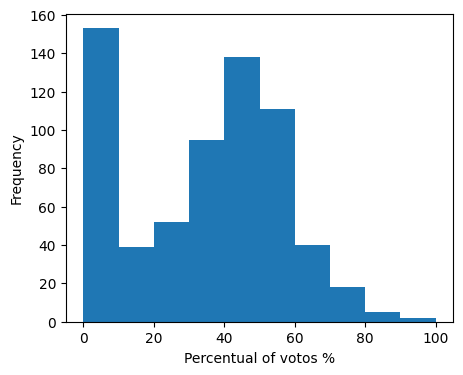

In [57]:
percentual = eleicao['PERCENTUAL_VOTOS']

binPop = pd.cut(percentual, 10)
binPop.value_counts()

ax = percentual.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('Percentual of votos %')

#### Explicação sobre o gráfico

Ao analisar a dispersão dos percentuais de votos dos candidatos em relação ao total de votos do município, observamos a organização desses valores ao longo do gráfico. Notavelmente, os percentuais apresentam uma distribuição abrangente, com uma quantidade significativa de valores distribuídos entre 0% e 20%, bem como entre 20% e 40%. Esta dispersão sugere uma distribuição relativamente equilibrada dos votos entre os candidatos, refletindo uma participação variada no eleitorado municipal. Isso pode indicar um cenário político diversificado e uma competição acirrada entre os candidatos.

### Boxplot para identificar possíveis outliers no percentual

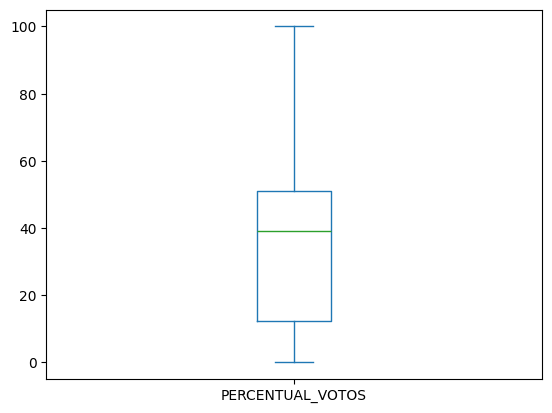

In [55]:
ax = percentual.plot.box()

#### Explicação sobre o gráfico (Boxplot)

O gráfico mostrou que quando analisamos o percentual dos votos por municipio não há a presença de outliers, isso acaba reduzindo impactos em diversas medidas de centralidade como é o caso por exemplo da média que acaba sendo afetada por esses outliers.

### Medidas de centralidade 

In [58]:
print(f"Média aritmética = {percentual.mean()}")
print(f"Moda = {percentual.mode()[0]}")
print(f"Mediana = {percentual.median()}")
print(f"Média truncada = {trim_mean(percentual, 0.1)}")


percentual.describe()

Média aritmética = 34.150076569678404
Moda = 0.0
Mediana = 39.244851258581235
Média truncada = 34.01505334234868


count    653.000000
mean      34.150077
std       22.412878
min        0.000000
25%       12.200387
50%       39.244851
75%       50.962720
max      100.000000
Name: PERCENTUAL_VOTOS, dtype: float64

#### Explicação sobre as médidas de centralidade:

A análise das medidas de centralidade revela informações importantes sobre a distribuição dos percentuais de votos. A média aritmética, que representa o valor médio dos percentuais de votos, é de aproximadamente 34.15%. Como não se teve um número significante de outliers os valores acabam não sendo tão afetados.

A moda dos percentuais de votos é de 0.0%, sugerindo que muitos candidatos receberam esse percentual de votos. A mediana, que representa o valor central dos dados quando ordenados, é de aproximadamente 39.24%, indicando uma distribuição assimétrica dos votos. A média truncada, que exclui os valores extremos, é de cerca de 34.02%, próxima à média aritmética.

A grande variação nos dados, evidenciada pelo desvio padrão de aproximadamente 22.41%, destaca a dispersão dos percentuais de votos em torno da média. Os quartis mostram que 25% dos percentuais de votos estão abaixo de 12.20%, enquanto 75% estão abaixo de 50.96%. O valor mínimo de 0.0% representa o ponto mais baixo na distribuição dos percentuais dos votos, enquanto o máximo de 100.0% indica o ponto mais alto.

Essas medidas de centralidade e dispersão ressaltam a importância de uma análise cuidadosa para interpretar corretamente os dados, especialmente devido à presença de outliers que podem distorcer as estimativas de tendência central.

### Qual foi o candidato mais votado segundo a quantidade de votos?

In [69]:
# Pessoa que obteve mais votos
maxqt_votos = eleicao['QT_VOTOS'].max()
candidatos_mais_votados = eleicao[eleicao['QT_VOTOS'] == maxqt_votos]

candidatos_mais_votados

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,SG_UE,NOME_MUNICIPIO,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,...,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,TOTAL_VOTOS_MUNICIPIO,PERCENTUAL_VOTOS
262,150000976695,2020,PB,20516,JOÃO PESSOA,PREFEITO,11,CICERO LUCENA,PP,05/08/1957,...,PARDA,OUTROS,ELEITO,260665.0,2894067.98,1867828.46,1123357.13,CICERO DE LUCENA FILHO,715339.0,36.439367


#### Explicação sobre a pessoa mais votada

Cicero Lucena como levantado é o candidato com maior quantidade de votos, ele é empresário da construção civil, foi presidente do Sinduscon de João Pessoa. Sobrinho do político paraibano Humberto Lucena, iniciou sua carreira política em 1990 quando foi escolhido para concorrer como vice-governador do PMDB na chapa encabeçada por Ronaldo Cunha Lima. Essa chapa venceu a eleição em segundo turno. Em 1994, com o afastamento de Cunha Lima para candidatar-se ao Senado, Cícero Lucena assume o governo do estado para o restante do mandato. Com 37 anos de idade, tornou-se o governador mais jovem a assumir o governo da Paraíba.

Ele teve uma vida politica muito ativa, e já teve apoio de grandes políticos da época e isso impussionou sua carreira até os dias atuais, porém, ele passou por algumas turbulencias segue o texto:

Enquanto ocupava o cargo de secretário estadual de Planejamento da Paraíba, foi preso em 21 de julho de 2005 pela Polícia Federal, acusado de chefiar uma quadrilha que foi desmascarada pela Operação Confraria.

Em 2006, foi eleito senador com 803 600 votos (48,25% dos votos válidos), derrotando seu maior rival, o então senador e candidato à reeleição Ney Suassuna.

Em 2012, Cícero foi indicado pelo PSDB como candidato a prefeito de João Pessoa para a eleição municipal deste ano, onde conseguiu chegar ao 2° turno do pleito como o segundo candidato mais votado no 1° turno com 75 170 votos (20,27% dos votos válidos). No 2° turno, foi derrotado nas urnas pelo candidato Luciano Cartaxo do PT que obteve 246 581 votos (68,13% dos votos válidos) contra seus 115 369 votos (31,87% dos votos válidos).

Em 2020, foi novamente eleito prefeito de João Pessoa, obtendo 53,16% dos votos e vencendo o candidato Nilvan Fereira (MDB) no segundo turno.

Link de onde foi retirado as informações: https://pt.wikipedia.org/wiki/C%C3%ADcero_Lucena

João Pessoa é o município mais populoso da Paraíba, isso pode ter ocasionado no grande número de votos associados ao candidato.

### Qual foi o candidato menos votado segundo a quantidade de votos?

In [70]:
maxqt_votos = eleicao['QT_VOTOS'].min()
candidatos_menos_votados = eleicao[eleicao['QT_VOTOS'] == maxqt_votos]

candidatos_menos_votados

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,SG_UE,NOME_MUNICIPIO,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,...,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,TOTAL_VOTOS_MUNICIPIO,PERCENTUAL_VOTOS
3,150001201835,2020,PB,21059,NOVA OLINDA,PREFEITO,40,IVAN SOUSA,PSB,25/02/1958,...,PARDA,AGRICULTOR,NÃO ELEITO,0.0,0.0,50000.0,123077.42,IVAN LUIS DE SOUSA,4303.0,0.0
123,150000802795,2020,PB,20699,LASTRO,PREFEITO,19,EMMANUEL,PODE,10/04/1977,...,BRANCA,COMERCIANTE,#NULO#,0.0,0.0,270000.0,123077.42,WILMESON EMMANUEL MENDES SARMENTO,3878.0,0.0
232,150000653131,2020,PB,19399,BELÉM,PREFEITO,15,EDGARD GAMA,MDB,04/06/1958,...,PARDA,EMPRESÁRIO,#NULO#,0.0,0.0,22896.0,261882.96,EDGARD GAMA,10351.0,0.0
293,150001063465,2020,PB,19933,CONDE,PREFEITO,19,MENUDO IRMÃO ADERALDO,PODE,14/10/1971,...,PRETA,PRODUTOR AGROPECUÁRIO,#NULO#,0.0,0.0,800000.0,238580.64,ADERALDO FERREIRA DOS SANTOS,16596.0,0.0
347,150001093869,2020,PB,19119,ALHANDRA,PREFEITO,25,RENATO,DEM,07/02/1978,...,BRANCA,ADMINISTRADOR,#NULO#,0.0,130000.0,208000.0,197393.92,RENATO MENDES LEITE,14654.0,0.0
468,150001029107,2020,PB,20311,GURJÃO,PREFEITO,11,DR. MARINHO,PP,25/01/1947,...,BRANCA,MÉDICO,#NULO#,0.0,0.0,0.0,123077.42,JOSE HERCULANO MARINHO IRMÃO,2620.0,0.0
574,150001134699,2020,PB,19828,RIACHO DE SANTO ANTÔNIO,PREFEITO,40,BETO GAGO,PSB,06/12/1967,...,BRANCA,SERVIDOR PÚBLICO ESTADUAL,#NULO#,0.0,0.0,60000.0,123077.42,JOSE ROBERTO DE LIMA,2063.0,0.0


#### Explicação sobre os candidatos menos votados

Bom como esperado tiveram candidatos que não possuiam nenhum valor significativo de votos, o que significa que eles não tem valor percentual de votos. Sendo assim todos os candidatos que foram aparesentados tinham 0 votos.

Uma coisa interessante segundo o site: https://jornaldaparaiba.com.br/politica/conversa-politica/ex-prefeito-de-alhandra-tera-que-devolver-r-653-milhoes-por-contratacao-ilegal/, o  Renato Mendes Leite que foi o candidato que apareceu com R$ 130000 em receita terá que devolver 6.53 milhões de reais por contração ilegal.

O ex-prefeito de Alhandra, Renato Mendes Leite, sofreu nova condenação no Tribunal de Contas do Estado da Paraíba (TCE-PB) ontem (27), pela contratação irregular de escritório de advocacia, sem processo licitatório e com alto valor. O Pleno da Corte de Contas entendeu que o pagamento no valor de R$ 6,53 milhões ao escritório S.Chaves Advocacia e Consultoria foi ilegal.

### Analise a dispersão de valor de receita

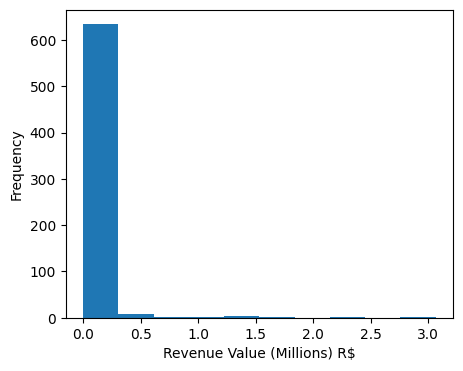

In [7]:
vr_receita = eleicao['VR_RECEITA']
vr_receita.fillna(0, inplace=True)
vr_receita_millions = vr_receita / 1000000

binPop = pd.cut(vr_receita_millions, 10)
binPop.value_counts()

ax = vr_receita_millions.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('Revenue Value (Millions) R$')

#### Explicação sobre o gráfico

Pelo histograma, podemos notar que a maioria das instâncias se concentra em valores de receita entre 0 e 0.3 milhões de reais, indicando que a maioria dos candidatos possui valores de receita nesse intervalo. Além disso, há poucas observações com valores de receita acima de 1 milhão de reais, pois as frequências nos intervalos acima de 1 milhão são quase 0. Isso sugere uma distribuição assimétrica dos valores de receita, com uma concentração maior de observações em valores menores.

### Boxplot para identificar possíveis outliers

<Axes: >

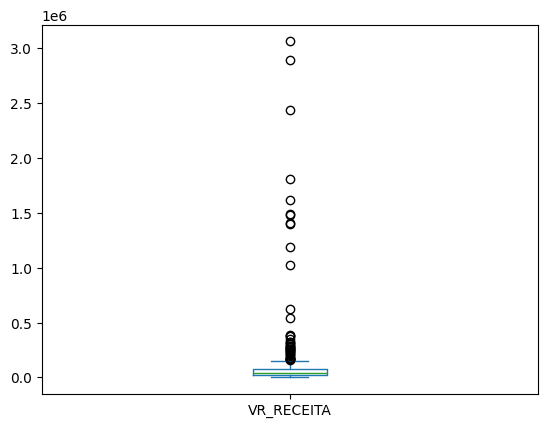

In [8]:
vr_receita.plot.box()

#### Explicação sobre o gráfico de boxplot

O gráfico de boxplot revela que a distribuição dos valores de receita é bastante assimétrica, com a maioria dos candidatos concentrados em faixas mais baixas de receita. Além disso, a presença de outliers, representados pelas bolinhas fora dos limites do boxplot, indica a existência de alguns candidatos com receitas significativamente mais altas em relação à maioria. Esses outliers podem influenciar as medidas de centralidade, como a mediana e a média, tornando-as menos representativas da distribuição geral dos dados.

### Médidas de centralidade valor de receita



In [9]:
print(f"Média = {vr_receita.mean()}")
print(f"Moda = {vr_receita.mode()[0]}")
print(f"Mediana = {vr_receita.median()}")
print(f"Média truncada = {trim_mean(vr_receita, 0.1)}")    

pd.set_option('display.float_format', lambda x: '%.2f' % x)
vr_receita.describe()

Média = 85859.53565084227
Moda = 0.0
Mediana = 41520.0
Média truncada = 46636.39135755258


count       653.00
mean      85859.54
std      248897.74
min           0.00
25%       19679.50
50%       41520.00
75%       73749.60
max     3063700.00
Name: VR_RECEITA, dtype: float64

#### Explicação sobre as médidas de centralidade:

A média, calculada em R$ 85.859,54, é suscetível a ser influenciada por outliers, especialmente quando a amostra apresenta um número significativo desses valores atípicos em relação ao conjunto de dados. É provável que a presença de vários outliers, como indicado pelo boxplot, tenha afetado a média, resultando em um valor relativamente alto.

Por outro lado, a moda é 0.0, o que indica que há uma quantidade considerável de candidatos com receita igual a zero. Embora a moda seja mais robusta em relação a outliers, seu valor pode não fornecer uma representação completa da distribuição dos dados, especialmente quando há uma presença significativa de zeros.

A mediana, que é R$ 41.520,00, representa o valor central dos dados quando organizados em ordem crescente. Ela é menos afetada por outliers do que a média, o que a torna uma medida de tendência central mais robusta para distribuições assimétricas ou com valores extremos.

A média truncada, calculada em R$ 46.636,39, é uma medida alternativa de tendência central que exclui uma porcentagem específica dos valores extremos, neste caso, os 10% mais extremos. Isso ajuda a reduzir o impacto dos outliers na estimativa da média.

A discrepância significativa entre todas as medidas de centralidade pode ser atribuída à grande variação nos dados, particularmente devido à presença de muitos outliers. Essa variação pode distorcer as estimativas de tendência central e enfatiza a importância de uma análise cuidadosa para interpretar corretamente os dados.

O desvio padrão é uma medida de dispersão que indica o quão distante os valores médios estão da média. O desvio padrão elevado, de R$ 248.897,74, sugere uma grande variabilidade nos dados, com valores dispersos em relação à média. Isso destaca a importância de considerar não apenas a média, mas também a dispersão dos dados ao analisar a distribuição da receita dos candidatos.

Os valores extremos observados também fornecem insights adicionais sobre a distribuição dos dados. O valor mínimo de receita é R$ 0.0, indicando que há candidatos com receita nula. O primeiro quartil está em R$ 19.679,50, o que significa que 25% dos candidatos têm receita abaixo desse valor. A mediana está em R$ 41.520,00, representando o ponto central dos dados. O terceiro quartil está em R$ 73.749,60, indicando que 75% dos candidatos têm receita abaixo desse valor. O valor máximo de receita é R$ 3.063.700,00, representando um valor muito elevado em relação à maioria dos dados, o que reforça a presença de outliers na distribuição.

In [10]:
# Resetando a configuração de formato de números
pd.reset_option('display.float_format')

### Qual seria o candidato com maior valor arrecadado para sua campanha?

In [11]:
most_collected = vr_receita.max()
eleicao[vr_receita == most_collected]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,SG_UE,NOME_MUNICIPIO,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,...,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,TOTAL_VOTOS_MUNICIPIO,PERCENTUAL_VOTOS
514,150000774536,2020,PB,19810,CAMPINA GRANDE,PREFEITO,55,BRUNO CUNHA LIMA,PSD,17/11/1990,...,BRANCA,EMPRESÁRIO,ELEITO,111526.0,3063700.0,221776.0,3981974.79,BRUNO CUNHA LIMA BRANCO,204444.0,54.550879


#### Explicação sobre a candidata com maior valor arrecadado:

O candidato com o maior valor arrecadado para sua campanha foi Bruno Cunha Lima, que concorreu à prefeitura em 2020 pelo PSD. Ele conseguiu arrecadar um total de R$ 3.063.700,00 para financiar sua campanha eleitoral. Bruno Cunha Lima nasceu em 17 de novembro de 1990, tornando-o um dos candidatos mais jovens na corrida eleitoral, com 30 anos na época da eleição. Ele é do sexo masculino, tem educação superior completa e é solteiro. Bruno é classificado como branco e sua ocupação é empresário.

Sua vitória nas eleições o levou ao cargo de prefeito, sendo eleito com um total de 111.526 votos. Além disso, ele tinha um valor significativo de bens declarados no valor de R$ 221.776,00. Isso demonstra uma grande mobilização de recursos financeiros e apoio político em sua campanha.

Uma das propostas de Bruno foi a de oferecer reforço escolar no contraturno na rede municipal de ensino para compensar o ano letivo perdido devido ao novo coronavírus. A declaração aconteceu durante entrevista à rádio CBN Paraíba. Ainda em relação à educação, o candidato falou sobre a pretensão de parcerias público-privadas e afirmou que, se necessário, no pós pandemia, a prefeitura irá comprar vagas em creches particulares para evitar seu fechamento. Informação encontrada no site: https://g1.globo.com/pb/paraiba/noticia/2020/11/15/bruno-cunha-lima-do-psd-e-eleito-prefeito-de-campina-grande.ghtml

### Qual seria o candidato com menor valor arrecadado para sua campanha?

In [12]:
less_collected = vr_receita.min()
eleicao[vr_receita == less_collected]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,SG_UE,NOME_MUNICIPIO,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,...,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,TOTAL_VOTOS_MUNICIPIO,PERCENTUAL_VOTOS
3,150001201835,2020,PB,21059,NOVA OLINDA,PREFEITO,40,IVAN SOUSA,PSB,25/02/1958,...,PARDA,AGRICULTOR,NÃO ELEITO,0.0,0.0,50000.00,123077.42,IVAN LUIS DE SOUSA,4303.0,0.000000
64,150000839087,2020,PB,22071,SAPÉ,PREFEITO,20,JOSINALDO FERREIRA,PSC,30/03/1979,...,BRANCA,SERVIDOR PÚBLICO ESTADUAL,NÃO ELEITO,47.0,0.0,100000.00,225948.14,JOSINALDO FRANCISCO FERREIRA,27045.0,0.173784
68,150001188993,2020,PB,19941,BOA VISTA,PREFEITO,90,SOCORRO LIMA,PROS,30/10/1983,...,BRANCA,TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...,NÃO ELEITO,697.0,0.0,0.00,123077.42,MARIA DO SOCORRO ARAUJO LIMA,4435.0,15.715896
74,150000730972,2020,PB,20290,GURINHÉM,PREFEITO,12,TARCISIO,PDT,11/10/1958,...,BRANCA,ADMINISTRADOR,#NULO#,4871.0,0.0,0.00,123077.42,TARCISIO SAULO DE PAIVA,13943.0,34.935093
114,150000999386,2020,PB,20737,LUCENA,PREFEITO,25,ALEX MONTEIRO,DEM,12/03/1981,...,PARDA,COMERCIANTE,#NULO#,4471.0,0.0,15000.00,123077.42,ALEX MENDONÇA CAMELO,14234.0,31.410707
123,150000802795,2020,PB,20699,LASTRO,PREFEITO,19,EMMANUEL,PODE,10/04/1977,...,BRANCA,COMERCIANTE,#NULO#,0.0,0.0,270000.00,123077.42,WILMESON EMMANUEL MENDES SARMENTO,3878.0,0.000000
147,150001179897,2020,PB,21199,PAULISTA,PREFEITO,43,ZÉ ANTÔNIO,PV,08/05/1963,...,BRANCA,EMPRESÁRIO,NÃO ELEITO,71.0,0.0,115000.00,123077.42,JOSÉ ANTÔNIO DA SILVA,8225.0,0.863222
155,150000634548,2020,PB,22217,SOLÂNEA,PREFEITO,25,KAISER ROCHA,DEM,05/11/1974,...,BRANCA,ADVOGADO,#NULO#,10830.0,0.0,343900.00,123077.42,KAYSER NOGUEIRA PINTO ROCHA,26929.0,40.216867
164,150001065754,2020,PB,19933,CONDE,PREFEITO,33,EMANUEL,PMN,09/08/1981,...,BRANCA,BANCÁRIO E ECONOMIÁRIO,NÃO ELEITO,8.0,0.0,123932.21,238580.64,EMANUEL DE SANTANA MAGLIANO,16596.0,0.048204
222,150000795061,2020,PB,20001,SANTA CECÍLIA,PREFEITO,25,BETO DE CHICO,DEM,25/11/1970,...,NÃO INFORMADO,OUTROS,#NULO#,2544.0,0.0,630000.00,123077.42,ROBERTO FLORENTINO PESSOA,7980.0,31.879699


#### Explicação sobre os menores valores arrecadados para campanhas:

Bom como esperado tiveram candidatos que não possuiam nenhum valor significativo de votos, o que significa que eles não tem valor percentual de votos. Sendo assim todos os candidatos que foram aparesentados tinham 0 votos.

Segue abaixo uma breve descrição de alguns candidatos com os menores valores arrecadados para suas campanhas, todos eles obtiveram 0,00 reais em arrecadação:

- Ivan Sousa (PSB): Nasceu em 25/02/1958, tem 62 anos, é do gênero masculino, possui ensino médio completo, é casado, tem cor parda e ocupa a profissão de agricultor. Ele não foi eleito.

- Josinaldo Ferreira (PSC): Nasceu em 30/03/1979, tem 41 anos, é do gênero masculino, possui ensino superior incompleto, é solteiro, tem cor branca e ocupa a profissão de servidor público estadual. Ele não foi eleito.

- Socorro Lima (PROS): Nasceu em 30/10/1983, tem 37 anos, é do gênero feminino, possui ensino médio completo, é solteira, tem cor branca e ocupa a profissão de técnico de enfermagem e assemelhados. Ela não foi eleita.

### Qual seria dispersão de idade dos candidatos na data da posse:

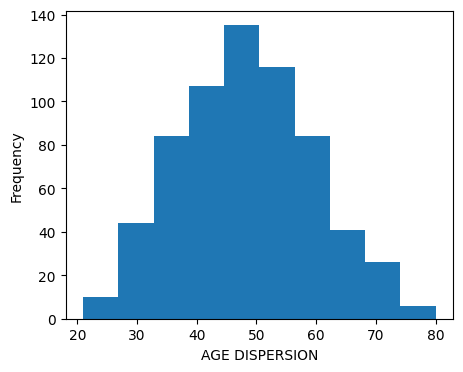

In [13]:
age = eleicao['NR_IDADE_DATA_POSSE']

binPop = pd.cut(age, 10)
binPop.value_counts()

ax = age.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('AGE DISPERSION')

#### Explicação sobre a dispersão de idades:

A partir da visualização da dispersão de idades, observa-se que a maioria das instâncias concentra-se na faixa etária entre 45 e 53 anos, indicando uma presença significativa de candidatos nessa faixa etária. Além disso, é possível identificar um grupo reduzido de dados que se situam nas faixas etárias extremas, com candidatos de 21 a 28 anos e de 75 a 80 anos. Essa distribuição sugere uma assimetria na dispersão das idades dos candidatos, com uma concentração mais acentuada em faixas etárias intermediárias e uma presença menos frequente nas faixas etárias mais jovens e mais velhas.

### Qual seria o candidato mais novo a ser eleito?


In [14]:
less_age = age.min()
eleicao[age == less_age]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,SG_UE,NOME_MUNICIPIO,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,...,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,TOTAL_VOTOS_MUNICIPIO,PERCENTUAL_VOTOS
187,150000932058,2020,PB,19470,BOM SUCESSO,PREFEITO,22,MATHEUS GOMES,PL,03/08/1999,...,BRANCA,EMPRESÁRIO,NÃO ELEITO,545.0,30350.0,3536.0,123077.42,MATHEUS GOMES DA SILVA,3619.0,15.059409
388,150000635482,2020,PB,21075,NOVA PALMEIRA,PREFEITO,22,PIERRY,PL,18/10/1999,...,BRANCA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",NÃO ELEITO,1298.0,41320.0,0.0,123077.42,PIERRY ÂNGELO DA SILVA ARAÚJO,2944.0,44.089674


#### Analisando os dados de menor idade:

Os candidatos mais jovens, Matheus Gomes e Pierry Ângelo da Silva Araújo, ambos com 21 anos na data da posse e filiados ao Partido Liberal (PL), apresentam diferenças notáveis em seus desempenhos eleitorais, financiamento de campanha e ocupações. Embora tenham concorrido com despesas máximas de campanha semelhantes, Matheus declarou uma receita menor e possuía bens pessoais, enquanto Pierry obteve uma receita maior, sem declarar bens. Pierry também conquistou uma parcela significativamente maior de votos em comparação com Matheus. Essas distinções sugerem variações na aceitação dos eleitores e nas estratégias de campanha adotadas pelos candidatos mais jovens, destacando a complexidade dos fatores que influenciam o sucesso político em eleições locais.

### Qual seria o candidato mais velho a ser eleito?




In [15]:
older_age = age.max()
eleicao[age == older_age]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,SG_UE,NOME_MUNICIPIO,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,...,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,TOTAL_VOTOS_MUNICIPIO,PERCENTUAL_VOTOS
633,150000748078,2020,PB,19259,AROEIRAS,PREFEITO,23,GILBERTO BEZERRA,CIDADANIA,18/12/1940,...,BRANCA,OUTROS,NÃO ELEITO,4648.0,0.0,300000.0,123077.42,GILBERTO BEZERRA DE SOUZA,12330.0,37.696675


#### Explicação do candidato mais velho:

O candidato mais velho na disputa eleitoral, Gilberto Bezerra de Souza, de 80 anos, apresentou um desempenho eleitoral notável, conquistando 4.648 votos. Sua campanha, embora não tenha declarado receita, foi planejada com uma despesa máxima considerável de R$ 123.077,42, indicando uma estratégia política ativa. Gilberto Bezerra de Souza, viúvo e com ocupação classificada como "Outros", representa uma figura experiente e reconhecida pelos eleitores, evidenciando que sua idade avançada não impediu sua relevância política na disputa eleitoral.

## Análise das relações entre variáveis 

#### Analisando a correlação de número de votos e valor de arrecadação para a campanha

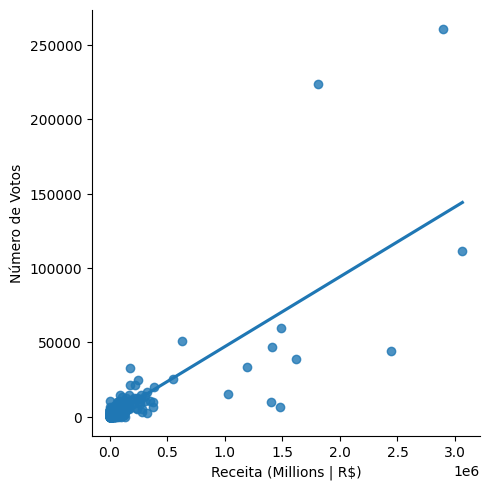

In [16]:
# INSIRA SEU CÓDIGO AQUI
ax = sns.lmplot(data=eleicao, x="VR_RECEITA", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Receita (Millions | R$)", "Número de Votos")

#### Explicação sobre o gráfico de coorelação (Scatterplot)

Ao analisar a relação entre o valor de receita e o número de votos, observa-se uma falta de associação clara entre as duas variáveis. Inicialmente, nota-se uma concentração significativa de valores de receita entre 0,0 e 0,5 milhões, juntamente com uma grande quantidade de observações com até 50.000 votos. No entanto, não se evidencia uma relação direta entre os valores de receita e o número de votos.

In [17]:
x = eleicao['VR_RECEITA']
y = eleicao['QT_VOTOS']

pd.Series({
    'pearson': x.corr(y, method='pearson'),
    'spearman': x.corr(y, method='spearman'),
    'kendall': x.corr(y, method='kendall')
}, name='correlacao').to_frame()

,correlacao
pearson,0.784322
spearman,0.644311
kendall,0.485167


#### Explicação sobre os coeficientes 

Os coeficientes de correlação entre a receita da campanha (VR_RECEITA) e a quantidade de votos recebidos (QT_VOTOS) revelam uma forte associação positiva entre essas variáveis. O coeficiente de Pearson, com um valor de 0.784322, indica uma correlação forte, sugerindo que candidatos com maiores receitas tendem a receber mais votos. Os coeficientes de Spearman (0.644311) e Kendall (0.485167), por sua vez, corroboram essa tendência, capturando aspectos não lineares e de classificação da relação entre as variáveis (correlação moderada). Em conjunto, esses coeficientes sugerem que a arrecadação financeira tem uma influência significativa no desempenho eleitoral, sendo um indicador importante a ser considerado na análise da dinâmica política.

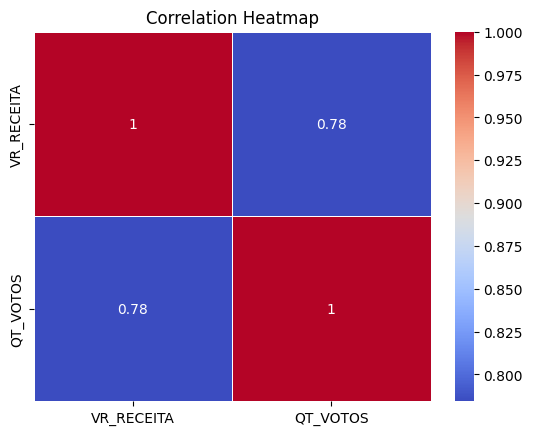

In [18]:
heatmap_data = eleicao[['VR_RECEITA', 'QT_VOTOS']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Analisando o gráfico de heatmap:

O heatmap é uma representação visual que nos permite identificar padrões e correlações entre variáveis em um conjunto de dados. No caso apresentado, temos duas variáveis: a receita da campanha (VR_RECEITA) e a quantidade de votos recebidos (QT_VOTOS). O valor exibido na interseção das variáveis indica o grau de correlação entre elas. Por exemplo, o valor 1 na diagonal principal indica a correlação perfeita entre uma variável e ela mesma (auto-correlação), enquanto os valores fora da diagonal representam a correlação entre pares de variáveis distintas. No caso específico, temos um valor de 1 na diagonal para ambas as variáveis, indicando uma correlação perfeita entre elas. Além disso, o valor de 0.78 fora da diagonal destaca uma forte correlação positiva entre a receita da campanha e a quantidade de votos recebidos. Isso significa que, em geral, candidatos com maiores receitas tendem a receber mais votos, e vice-versa.

### Analisando a correlação entre valor de bem candidato e quantidade de votos:

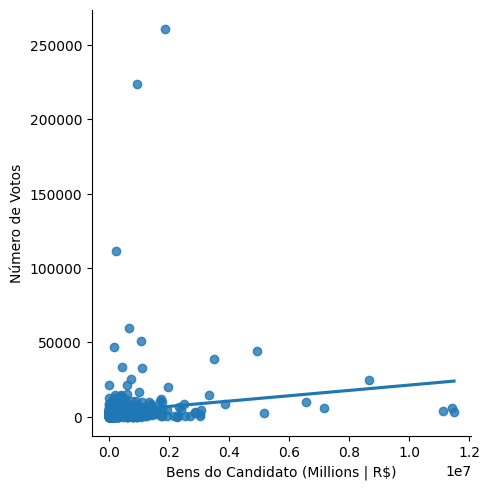

In [19]:
ax = sns.lmplot(data=eleicao, x="VR_BEM_CANDIDATO", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Bens do Candidato (Millions | R$)", "Número de Votos")

#### Explicação sobre o gráfico de correlação entre bens do candidato e número de votos (Scatterplot)
Após analisar os dados, não encontramos uma relação clara entre o valor dos bens e a quantidade de votos. A maioria dos candidatos possui bens na faixa de 0 a 0,2 milhões de reais e recebe até cerca de 30.000 votos. No entanto, há exceções, como o candidato mais votado, que se destaca mesmo dentro dessa maioria. Isso sugere que outros fatores, além do valor dos bens, podem influenciar os resultados eleitorais. Essa exceção destaca a complexidade do processo eleitoral, onde elementos como campanha política e popularidade também desempenham um papel importante.

In [20]:
max_vr_candidato = eleicao['VR_BEM_CANDIDATO'].max()
candidato = eleicao[eleicao['VR_BEM_CANDIDATO'] == max_vr_candidato].reset_index()
candidato


,index,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,SG_UE,NOME_MUNICIPIO,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,...,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,TOTAL_VOTOS_MUNICIPIO,PERCENTUAL_VOTOS
0,512,150000727056,2020,PB,20877,MATARACA,PREFEITO,22,IZAIAS BESSA,PL,...,PARDA,PRODUTOR AGROPECUÁRIO,NÃO ELEITO,3514.0,122688.0,11494845.07,123077.42,ANTONIO IZAIAS BESSA FILHO,7121.0,49.347002


#### Explicação sobre o candidato que tinha 11 milhões de bens avaliados
O candidato, Antonio Izaias Bessa Filho, concorreu ao cargo de prefeito nas eleições de 2020 no estado da Paraíba, representando o partido PL (Partido Liberal). Ele nasceu em 04/05/1956, o que significa que tinha 64 anos na data da posse.

Sua ocupação é listada como produtor agropecuário. Apesar de ter um valor significativo de bens declarados, avaliados em mais de onze milhões de reais, e uma receita de campanha de 122.688,00 reais, não obteve sucesso na eleição, onde recebeu um total de 3.514 votos, correspondendo a aproximadamente 10,87% do total de votos, e teve uma despesa máxima de campanha de 123.077,42 reais.

Uma curiosidade sobre o candidato Antonio Isaias Bessa Filho é que há registros de sua participação em processos judiciais. No Tribunal de Justiça do Rio de Janeiro (TJRJ), um dos processos, de número 002XXXX-55.2013.8.19.0008, trata-se de uma questão relacionada a "Intimação Ou Notificação, Atos Processuais". Já no Tribunal Regional Federal da 5ª Região (TRF5), outro processo, de número 000XXXX-94.2004.4.05.8200, envolve uma "Apelação em Mandado de Segurança", onde a Fazenda Nacional é uma das partes. Informações encontradas no site: https://www.jusbrasil.com.br/processos/nome/74839073/antonio-isaias-bessa-filho

In [21]:
x = eleicao['VR_BEM_CANDIDATO']
y = eleicao['QT_VOTOS']

pd.Series({
    'pearson': x.corr(y, method='pearson'),
    'spearman': x.corr(y, method='spearman'),
    'kendall': x.corr(y, method='kendall')
}, name='correlacao').to_frame()

,correlacao
pearson,0.128433
spearman,0.304308
kendall,0.211556


#### Explicação sobre os coeficiente de correlação
Os coeficientes de correlação entre o valor dos bens declarados pelo candidato (VR_BEM_CANDIDATO) e a quantidade de votos recebidos (QT_VOTOS) revelam uma fraca associação positiva entre essas variáveis. O coeficiente de Pearson, com um valor de 0.128433, indica uma correlação leve, sugerindo que candidatos com maiores valores de bens tendem a receber um número um pouco maior de votos, mas a relação não é tão forte. Os coeficientes de Spearman (0.304308) e Kendall (0.211556) também mostram uma associação positiva, embora mais moderada, capturando aspectos não lineares e de classificação da relação entre as variáveis. Em conjunto, esses coeficientes indicam que o valor dos bens declarados pelo candidato ainda tem uma influência, mas talvez não seja tão determinante quanto em casos de correlação mais forte.

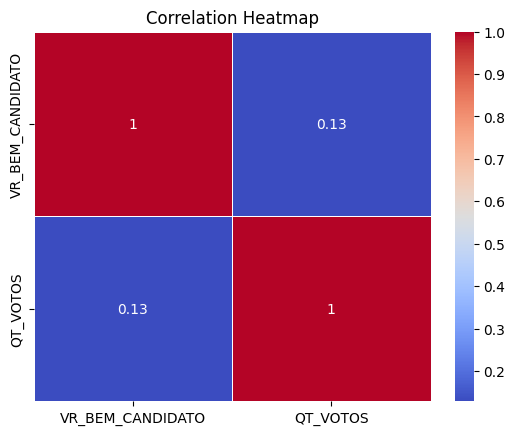

                  VR_BEM_CANDIDATO  QT_VOTOS
VR_BEM_CANDIDATO          1.000000  0.128433
QT_VOTOS                  0.128433  1.000000


In [15]:
heatmap_data = eleicao[['VR_BEM_CANDIDATO', 'QT_VOTOS']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

heatmap_string = heatmap_data.to_string()
print(heatmap_string)

#### Explicação sobre o gráfico de heatmap:
O heatmap é uma representação visual que nos permite identificar padrões e correlações entre variáveis em um conjunto de dados. No caso apresentado, temos duas variáveis: o valor dos bens declarados pelos candidatos (VR_BEM_CANDIDATO) e a quantidade de votos recebidos por eles (QT_VOTOS). O valor exibido na interseção das variáveis indica o grau de correlação entre elas. Por exemplo, o valor 1 na diagonal principal indica a correlação perfeita entre uma variável e ela mesma (auto-correlação), enquanto os valores fora da diagonal representam a correlação entre pares de variáveis distintas. No caso específico, temos um valor de 1.000000 para VR_BEM_CANDIDATO e 0.128433 para QT_VOTOS. Isso sugere que há uma correlação positiva muito leve entre o valor dos bens declarados e a quantidade de votos recebidos. Essa correlação indica que, em geral, candidatos com bens declarados mais valiosos tendem a receber um número ligeiramente maior de votos, mas a relação não é muito forte.

### Fazendo o log da receita para tentar analisar uma possível correlação entre as variáveis

/home/kawhan/mycodes/analise_dados/atividades_analise/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kawhan/mycodes/analise_dados/atividades_analise/.venv/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/kawhan/mycodes/analise_dados/atividades_analise/.venv/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


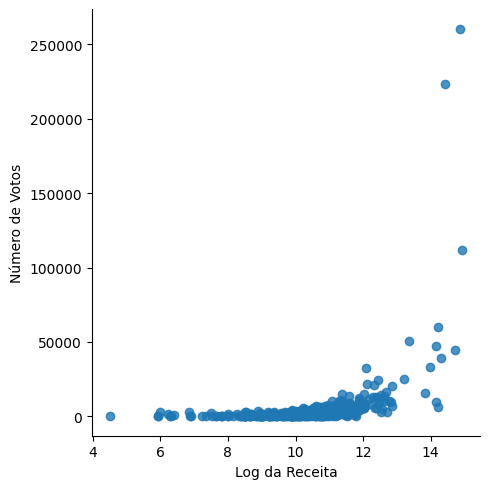

In [14]:
eleicao['log_receita'] = np.log(eleicao['VR_RECEITA'])
ax = sns.lmplot(data=eleicao, x="log_receita", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Log da Receita", "Número de Votos")

plt.show()

#### Explicação sobre o uso do log da receita

Para tentar ter uma visualização diferente da receita declarada pelos candidatos foi o aplicado a função de log, isso ajuda a mudar um pouco a concentração dos dados apresentados com o objetivo de tentar captar algum tipo de relação. O que foi notado é que basicamente não existe uma relação forte entre as 2 variáveis apresentadas, isso porque em alguns casos a receita ainda continua sendo grande e o número de votos ainda continua sendo pequeno mesmo com o aumento. Porém, a dispersão dos dados mudou em comparação com que foi analisado anteriormente sem o uso de log.

### Aplicando log em ambas as variáveis

/home/kawhan/mycodes/analise_dados/atividades_analise/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kawhan/mycodes/analise_dados/atividades_analise/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kawhan/mycodes/analise_dados/atividades_analise/.venv/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/kawhan/mycodes/analise_dados/atividades_analise/.venv/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


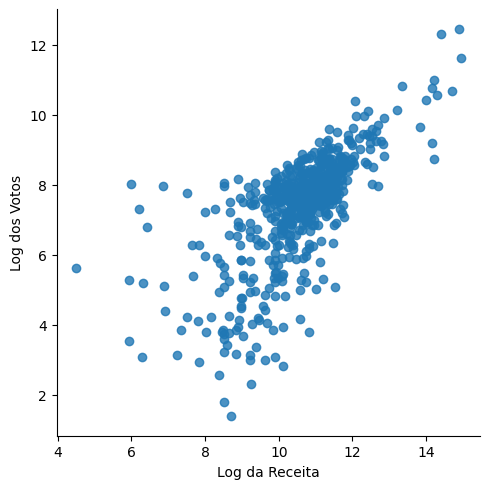

In [13]:
eleicao['log_receita'] = np.log(eleicao['VR_RECEITA'])
eleicao['log_votos'] = np.log(eleicao['QT_VOTOS'])
ax = sns.lmplot(data=eleicao, x="log_receita", y="log_votos", palette="muted", ci=None) 
ax.set_axis_labels("Log da Receita", "Log dos Votos")

plt.show()

#### Explicando sobre a utilização dos logs em ambas as variáveis (Quantidade de votos e receita de bens declarados)

Bom nitidamente da para observar um crescimento linear quando aplicado a função de log em ambas as variáveis, quando a receita aumenta o número de votos também aumenta, sendo diretamente proporcional esse crescimento. Pontos da utilização de log como redução da amplitude dos dados com a utilização de log, redução de assimetria reduzindo a cauda longa em uma direção, estabilização da variância entre outros pontos podem explicar porque a utilização do log se torna uma solução boa nesses casos.


## Análise de regressão 


### Analisando a relação entre Valor de receita e Quantida de votos

In [7]:
# INSIRA SEU CÓDIGO AQUI
eleicao['VR_RECEITA'].fillna(0)
eleicao['QT_VOTOS'].fillna(0)


predictors = ['VR_RECEITA']
outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao[predictors], eleicao[outcome])
print(f'b0 (intercept): {model.intercept_:.2f}')
print(f'b1 (coefficient): {model.coef_[0]:.2f}')

b0 (intercept): 177.23
b1 (coefficient): 0.05


#### Explicação sobre as variáveis de predição

O intercepto b0=177.23 é a estimativa de QT_VOTOS para Exposure = 0. Isso sugere que, quando a variável preditora, no caso a receita (VR_RECEITA), é zero, espera-se que o candidato receba aproximadamente 177 votos. É importante ressaltar que, na prática, pode não haver candidatos com receita de campanha exatamente zero nos dados. O intercepto captura o efeito médio de outras variáveis não incluídas no modelo.

Quanto ao coeficiente b1=0.05, ele representa o aumento na quantidade de votos para cada unidade adicional de aumento na receita de campanha (VR_RECEITA). Isso significa que espera-se um acréscimo de 0.05 votos a cada aumento de receita. Esses resultados sugerem uma relação positiva entre a receita de campanha e a quantidade de votos recebidos. Em outras palavras, candidatos com maiores receitas tendem a receber mais votos, em média, em comparação com aqueles com receitas menores. No entanto, é importante ressaltar que o coeficiente pode variar dependendo de vários fatores, como o contexto político, a popularidade do candidato e as estratégias de campanha.

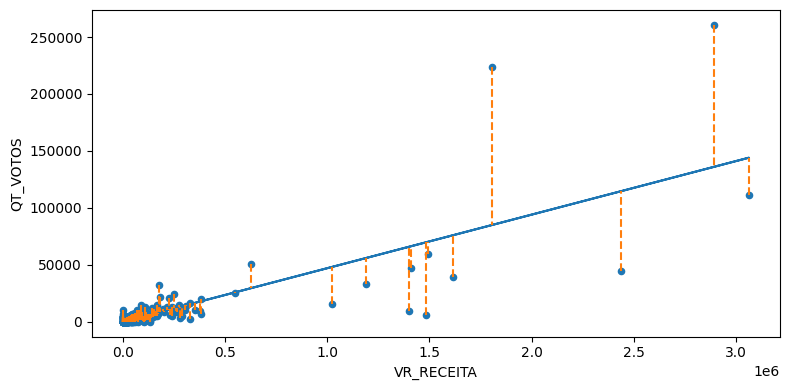

In [8]:
fitted = model.predict(eleicao[predictors])
residuals = eleicao[outcome] - fitted

ax = eleicao.plot.scatter(x='VR_RECEITA', y='QT_VOTOS', figsize=(8, 4))
ax.plot(eleicao.VR_RECEITA, fitted)
for x, yactual, yfitted in zip(eleicao.VR_RECEITA, eleicao.QT_VOTOS, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

#### Explicação sobre o gráfico acima.

Os dados nem sempre se alinham perfeitamente em uma linha reta. Para cada valor original de yi, há um erro explícito, denotado como ei, e o erro residual é a discrepância entre o valor original e o estimado. Neste caso, não observamos uma quantidade significativa de pontos representando os erros residuais. O que ocorre é que a concentração dos dados no início acaba obscurecendo a visualização desses erros.

#### Avaliando o modelo 

In [9]:
RMSE = np.sqrt(mean_squared_error(eleicao[outcome], fitted))
r2 = r2_score(eleicao[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

Root Mean Square Error (RMSE): 9237
Coefficiente of determination (r2): 0.6152


#### Explicação sobre a avaliação do modelo (Valor de receita e a quantidade de votos):

Na avaliação do nosso modelo, empregamos o RMSE, que é uma métrica indicativa da média das diferenças entre os valores previstos pelo modelo e os valores observados. Ele nos fornece uma medida de quão bem o modelo se ajusta aos dados. No presente estudo, o RMSE é de 9237. Isso indica que, em média, as previsões do modelo estão aproximadamente a 9237 unidades de distância dos valores reais de votos (QT_VOTOS). Em termos simples, quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados. Assim, um RMSE de 9237 sugere que o modelo pode não estar capturando completamente a variabilidade presente nos dados eleitorais.

Quanto ao coeficiente de determinação (r2), esta métrica indica a proporção da variabilidade na variável de resposta (QT_VOTOS) que é explicada pelo modelo. Varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados. No caso em questão, o r2 é de 0.6152, o que significa que aproximadamente 61.52% da variabilidade na quantidade de votos é explicada pelas variáveis incluídas no modelo, que, neste caso, consistem apenas na receita de campanha.

In [12]:
model = sm.OLS(eleicao[outcome], eleicao[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QT_VOTOS   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.92
Date:                Fri, 12 Apr 2024   Prob (F-statistic):            0.00100
Time:                        10:58:50   Log-Likelihood:                -7195.5
No. Observations:                 653   AIC:                         1.439e+04
Df Residuals:                     651   BIC:                         1.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
VR_BEM_CANDIDATO     0.0018      0.001      3.304      0.001       0.001       0.003
const             3420.5694    626.027      5.464      0.000    2191.294    4649.845
==============================================================================
Omnibus:                     1256.969   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1212655.727
Skew:                          13.556   Prob(JB):                         0.00
Kurtosis:                     212.366   Cond. No.                     1.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Explicações adicionais com o uso do results.summary()

O valor de P>|t| de 0.000 para a primeira variável preditora indica uma relevância estatística significativa dessa variável na previsão do número de votos. Isso salienta que a receita é um fator que potencialmente influencia a quantidade de votos recebidos pelos candidatos. No entanto, é crucial ressaltar que essa influência não é determinada exclusivamente por essa variável. No mundo real, existem diversas outras variáveis que também exercem impacto sobre o resultado final dos votos, variando de acordo com o sistema eleitoral e outras circunstâncias específicas.

#### Analisando com relação ao valor de bens do candidato

In [23]:
eleicao['VR_BEM_CANDIDATO'].fillna(0)


predictors = ['VR_BEM_CANDIDATO']
outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao[predictors], eleicao[outcome])
print(f'b0 (intercept): {model.intercept_:.2f}')
print(f'b1 (coefficient): {model.coef_[0]:.2f}')

b0 (intercept): 3420.57
b1 (coefficient): 0.00


#### Explicação sobre as variáveis de predição

Como mencionado anteriormente, o intercepto b0 (3420.57) é a estimativa de QT_Votos para Exposure = 0. Em outras palavras, o b0 representa a estimativa da quantidade de votos (QT_Votos) quando o valor da variável preditora, neste caso o valor de bens declarados (VR_BEM_CANDIDATO), é zero. Em termos práticos, isso significa que, para um candidato cujo valor de bens declarados seja zero, espera-se que ele receba aproximadamente 3420 votos. Vale ressaltar que pode não haver candidatos com um valor de bens declarados exatamente zero nos dados. O intercepto é uma parte do modelo que captura o efeito médio de outras variáveis não incluídas no modelo.

No caso do coeficiente b1 (0.00), ele indica que não há aumento na quantidade de votos para cada unidade adicional de aumento no valor de bens declarados (VR_BEM_CANDIDATO). Em outras palavras, espera-se que não haja aumento nos votos para cada aumento no valor de bens. Isso sugere uma relação neutra entre o valor de bens declarados do candidato e a quantidade de votos recebidos. Em resumo, candidatos com maiores valores de bens declarados não parecem afetar o número de votos.

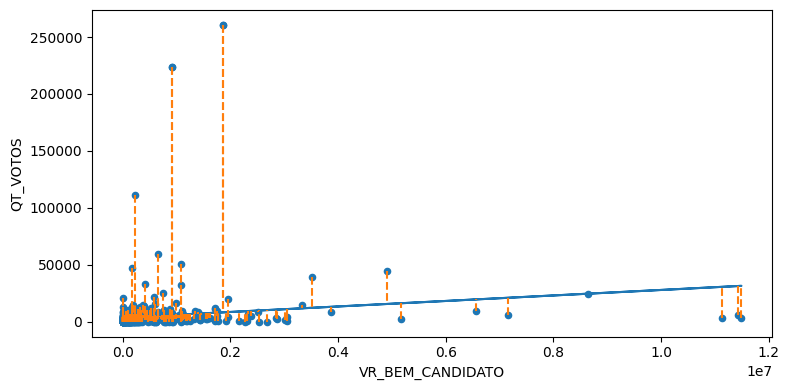

In [90]:
fitted = model.predict(eleicao[predictors])
residuals = eleicao[outcome] - fitted

ax = eleicao.plot.scatter(x='VR_BEM_CANDIDATO', y='QT_VOTOS', figsize=(8, 4))
ax.plot(eleicao.VR_BEM_CANDIDATO, fitted)
for x, yactual, yfitted in zip(eleicao.VR_BEM_CANDIDATO, eleicao.QT_VOTOS, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

#### Explicação sobre o gráfico acima

Analisando o gráfico acima podemos usar a explicação anterior sobre o residual de erros levantados junto com o modelo de predição, no caso atual podemos observar que existem sim vários pontos fora da curva apresentado pelo modelo.

#### Avaliando o modelo 

In [11]:
RMSE = np.sqrt(mean_squared_error(eleicao[outcome], fitted))
r2 = r2_score(eleicao[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

Root Mean Square Error (RMSE): 9237
Coefficiente of determination (r2): 0.6152


#### Explicação sobre a avaliação do modelo (Valor de bens declarados e a quantidade de votos):

Na avaliação do nosso modelo, empregamos o RMSE, uma métrica que expressa a média das discrepâncias entre os valores observados e os valores previstos pelo modelo. O RMSE de 9237 indica que, em média, as previsões do modelo estão a cerca de 9237 unidades de distância dos valores reais de votos (QT_VOTOS). Em resumo, quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados. No entanto, vale destacar que um RMSE de 9237 sugere que o modelo pode não estar capturando completamente toda a variabilidade presente nos dados eleitorais.

Quanto ao Coeficiente de Determinação (r2), que registra 0.6152, sugere que aproximadamente 61.52% da variabilidade na quantidade de votos é explicada pelas variáveis incluídas no modelo. Esta métrica varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados. No entanto, neste caso, o valor de 0.6152 significa que cerca de 61.52% da variabilidade na quantidade de votos é explicada pelas variáveis consideradas no modelo, que neste caso se restringem apenas à informação sobre o valor dos bens declarados pelos candidatos (VR_BEM_CANDIDATO).

In [92]:
model = sm.OLS(eleicao[outcome], eleicao[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QT_VOTOS   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     11.18
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           0.000872
Time:                        23:31:27   Log-Likelihood:                -7406.0
No. Observations:                 655   AIC:                         1.482e+04
Df Residuals:                     653   BIC:                         1.483e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
VR_BEM_CANDIDATO     0.0024      0.001      3.344      0.001       0.001       0.004
const             3866.0351    834.367      4.633      0.000    2227.669    5504.401
==============================================================================
Omnibus:                     1118.866   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           448184.830
Skew:                          10.854   Prob(JB):                         0.00
Kurtosis:                     129.297   Cond. No.                     1.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Explicações adicionais com o uso do results.summary()
Para um VR_BEM_CANDIDATO com um valor de P>|t| de 0.001 sugere que o valor de bens declarados pelo candidato tem um impacto significante estatisticamente para a quantidade de votos recebido. Isso claro como falado anteriormente pode ser impactado por outras variáveis no caso real de uma possível eleição


### Analise utilizando regressão múltipla

In [29]:

dummy_siglas = pd.get_dummies(eleicao['SG_PARTIDO'], prefix='SG_PARTIDO', drop_first=True, dtype=int)
dummy_genero = pd.get_dummies(eleicao['DS_GENERO'], prefix='GENERO', drop_first=True, dtype=int)
dummy_cor_raca = pd.get_dummies(eleicao['DS_COR_RACA'], prefix='COR_RACA', drop_first=True, dtype=int)
dummy_grau_instrucao = pd.get_dummies(eleicao['DS_GRAU_INSTRUCAO'], prefix='GRAU_INSTRUCAO', drop_first=True, dtype=int)
dummy_estado_civil = pd.get_dummies(eleicao['DS_ESTADO_CIVIL'], prefix='ESTADO_CIVIL',drop_first=True, dtype=int)

eleicao_com_dummy = pd.concat([eleicao,dummy_cor_raca, dummy_genero, dummy_grau_instrucao, dummy_estado_civil, dummy_siglas], axis=1)
eleicao_com_dummy_sem_nulos = eleicao_com_dummy.fillna(0)

predictors = ['NR_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'COR_RACA_BRANCA', 'COR_RACA_INDÍGENA', 'COR_RACA_PARDA', 'COR_RACA_PRETA', 'GENERO_MASCULINO', 'GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO', 'GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO', 'GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO', 'GRAU_INSTRUCAO_LÊ E ESCREVE', 'GRAU_INSTRUCAO_SUPERIOR COMPLETO', 'GRAU_INSTRUCAO_SUPERIOR INCOMPLETO' , 'ESTADO_CIVIL_DIVORCIADO(A)', 'ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE', 'ESTADO_CIVIL_SOLTEIRO(A)', 'ESTADO_CIVIL_VIÚVO(A)','SG_PARTIDO_CIDADANIA', 'SG_PARTIDO_DC', 'SG_PARTIDO_DEM', 'SG_PARTIDO_MDB', 'SG_PARTIDO_PATRIOTA', 'SG_PARTIDO_PC do B', 'SG_PARTIDO_PCO', 'SG_PARTIDO_PDT', 'SG_PARTIDO_PL', 'SG_PARTIDO_PMN', 'SG_PARTIDO_PODE', 'SG_PARTIDO_PP', 'SG_PARTIDO_PROS', 'SG_PARTIDO_PRTB', 'SG_PARTIDO_PSB', 'SG_PARTIDO_PSC', 'SG_PARTIDO_PSD', 'SG_PARTIDO_PSDB', 'SG_PARTIDO_PSL', 'SG_PARTIDO_PSOL', 'SG_PARTIDO_PSTU', 'SG_PARTIDO_PT', 'SG_PARTIDO_PTB', 'SG_PARTIDO_PTC', 'SG_PARTIDO_PV', 'SG_PARTIDO_REDE', 'SG_PARTIDO_REPUBLICANOS', 'SG_PARTIDO_SOLIDARIEDADE', 'SG_PARTIDO_UNIÃO', 'SG_PARTIDO_UP', 'VR_RECEITA', 'VR_BEM_CANDIDATO']

outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao_com_dummy_sem_nulos[predictors], eleicao_com_dummy_sem_nulos[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')
    


Intercept: -4235.471
Coefficients:
 NR_CANDIDATO: 32.934113622471486
 NR_IDADE_DATA_POSSE: 37.67762842772995
 COR_RACA_BRANCA: -507.7016707463637
 COR_RACA_INDÍGENA: 888.9439015757285
 COR_RACA_PARDA: -754.7169062693353
 COR_RACA_PRETA: 5642.914994062856
 GENERO_MASCULINO: 2008.6500950322616
 GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO: -879.8910223197704
 GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO: 908.2974165298353
 GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO: 493.0430280680952
 GRAU_INSTRUCAO_LÊ E ESCREVE: 868.3480464642166
 GRAU_INSTRUCAO_SUPERIOR COMPLETO: -486.3359177536826
 GRAU_INSTRUCAO_SUPERIOR INCOMPLETO: 4515.461445363954
 ESTADO_CIVIL_DIVORCIADO(A): -1409.7417535424077
 ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE: 1049.400469279836
 ESTADO_CIVIL_SOLTEIRO(A): -945.9629719883904
 ESTADO_CIVIL_VIÚVO(A): 1705.4565484504972
 SG_PARTIDO_CIDADANIA: 2089.4731977877723
 SG_PARTIDO_DC: -161.48653604909003
 SG_PARTIDO_DEM: 492.19306145595823
 SG_PARTIDO_MDB: 5302.187965851686
 SG_PARTIDO_PATRIOTA: 

#### Explicação sobre os coeficientes:

O intercepto, como mencionado, é o valor esperado da variável dependente quando todas as variáveis independentes são zero. Neste caso, significa que quando todas as outras variáveis são zero, o número esperado de votos é de -4235.471.

Para explicar o efeito das outras variáveis, vamos tomar como exemplo a idade do candidato na data da posse. Conforme as estatísticas apresentadas, um aumento de uma unidade na idade (NR_IDADE_DATA_POSSE) está associado a um aumento de aproximadamente 37.68 votos.

No caso do gênero, onde o valor 1 representa o gênero masculino e 0 o feminino, observamos que um aumento de uma unidade no gênero masculino (GENERO_MASCULINO) está associado a um aumento de aproximadamente 2008.65 votos. Esse mesmo princípio se aplica às outras variáveis, onde cada coeficiente representa o efeito daquela variável sobre o número de votos, mantendo as outras variáveis constantes.

In [30]:
fitted = model.predict(eleicao_com_dummy_sem_nulos[predictors])
RMSE = np.sqrt(mean_squared_error(eleicao_com_dummy_sem_nulos[outcome], fitted))
r2 = r2_score(eleicao_com_dummy_sem_nulos[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

Root Mean Square Error (RMSE): 8786
Coefficiente of determination (r2): 0.6518


#### Explicação sobre as medidas apresentadas do RMSE e o coeficiente de determinação (R²)


No caso apresentado, o RMSE é de 8786, sugerindo que, em média, as previsões do modelo desviam cerca de 8786 unidades em relação aos valores reais. Além disso, o coeficiente de determinação (R²) é de 0.6518, indicando que aproximadamente 65.18% da variabilidade na quantidade de votos é explicada pelas variáveis incluídas no modelo. É importante observar que o valor de R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados.

In [31]:
model = sm.OLS(eleicao_com_dummy_sem_nulos[outcome], eleicao_com_dummy_sem_nulos[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QT_VOTOS   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     23.56
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          2.37e-108
Time:                        17:03:31   Log-Likelihood:                -6856.4
No. Observations:                 653   AIC:                         1.381e+04
Df Residuals:                     604   BIC:                         1.403e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
NR_CANDIDATO                                    27.7448     49.269      0.563      0.574     -69.014     124.503
NR_IDADE_DATA_POSSE                             37.6776     36.174      1.042      0.298     -33.364     108.720
COR_RACA_BRANCA                               -507.7017   3209.614     -0.158      0.874   -6811.061    5795.657
COR_RACA_INDÍGENA                              888.9439   7276.396      0.122      0.903   -1.34e+04    1.52e+04
COR_RACA_PARDA                                -754.7169   3197.563     -0.236      0.813   -7034.408    5524.974
COR_RACA_PRETA                                5642.9150   3701.843      1.524      0.128   -1627.132    1.29e+04
GENERO_MASCULINO                              2008.6501   1051.235      1.911      0.057     -55.869    4073.169
GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO  -879.8910   2014.060     -0.437      0.662   -4835.303    3075.521
GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO           908.2974   1721.114      0.528      0.598   -2471.797    4288.392
GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO         493.0430   3020.062      0.163      0.870   -5438.055    6424.141
GRAU_INSTRUCAO_LÊ E ESCREVE                    868.3480   3529.360      0.246      0.806   -6062.960    7799.656
GRAU_INSTRUCAO_SUPERIOR COMPLETO              -486.3359   1635.867     -0.297      0.766   -3699.014    2726.342
GRAU_INSTRUCAO_SUPERIOR INCOMPLETO            4515.4614   2213.497      2.040      0.042     168.376    8862.547
ESTADO_CIVIL_DIVORCIADO(A)                   -1409.7418   1307.728     -1.078      0.281   -3977.989    1158.505
ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE        1049.4006   5938.027      0.177      0.860   -1.06e+04    1.27e+04
ESTADO_CIVIL_SOLTEIRO(A)                      -945.9630   1042.040     -0.908      0.364   -2992.425    1100.499
ESTADO_CIVIL_VIÚVO(A)                         1705.4565   2862.688      0.596      0.552   -3916.574    7327.487
SG_PARTIDO_CIDADANIA                          1845.5739   1272.167      1.451      0.147    -652.835    4343.983
SG_PARTIDO_DC                                 -384.6284   4592.701     -0.084      0.933   -9404.232    8634.975
SG_PARTIDO_DEM                                 258.6725   1436.734      0.180      0.857   -2562.928    3080.273
SG_PARTIDO_MDB                                5016.7739   1671.345      3.002      0.003    1734.421    8299.127
SG_PARTIDO_PATRIOTA                           1423.6237   2898.814      0.491      0.624   -4269.355    7116.602
SG_PARTIDO_PC do B                           -4175.2235   3642.013     -1.146      0.252   -1.13e+04    2977.323
SG_PARTIDO_PCO                                 692.9138   8935.066      0.078      0.938   -1.69e+04    1.82e+04
SG_PARTIDO_PDT                  

#### Explicação sobre alguns outros coeficientes mostrados:

P>|t| indica significância estatística de preditor, quanto maior o t e menor seu p-valor, mais significativo é o preditor. No geral, p-valores <0.05 indicam significância estatística. 

Nesse caso podemos observar que SG_PARTIDO_MDB, SG_PARTIDO_PP e VR_RECEITA foram os unicos que pareceram ser significativos de acordo com o P>|t|, então podemos remover os outros preditores para tentar deixar o modelo melhor.

In [32]:
dummy_siglas = pd.get_dummies(eleicao['SG_PARTIDO'], prefix='SG_PARTIDO', drop_first=True, dtype=int)

eleicao_com_dummy = pd.concat([eleicao, dummy_siglas], axis=1)
eleicao_com_dummy_sem_nulos = eleicao_com_dummy.fillna(0)

predictors = ['SG_PARTIDO_MDB', 'SG_PARTIDO_PP','VR_RECEITA']

outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao_com_dummy_sem_nulos[predictors], eleicao_com_dummy_sem_nulos[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')

Intercept: -384.175
Coefficients:
 SG_PARTIDO_MDB: 4528.723053724027
 SG_PARTIDO_PP: 3752.5879163160266
 VR_RECEITA: 0.04674392037713915


In [33]:
fitted = model.predict(eleicao_com_dummy_sem_nulos[predictors])
RMSE = np.sqrt(mean_squared_error(eleicao_com_dummy_sem_nulos[outcome], fitted))
r2 = r2_score(eleicao_com_dummy_sem_nulos[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

Root Mean Square Error (RMSE): 9125
Coefficiente of determination (r2): 0.6245


In [34]:
model = sm.OLS(eleicao_com_dummy_sem_nulos[outcome], eleicao_com_dummy_sem_nulos[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QT_VOTOS   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     359.8
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.49e-137
Time:                        17:14:01   Log-Likelihood:                -6881.1
No. Observations:                 653   AIC:                         1.377e+04
Df Residuals:                     649   BIC:                         1.379e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
SG_PARTIDO_MDB  4528.7231   1448.292      3.127      0.002    1684.819    7372.627
SG_PARTIDO_PP   3752.5879   1366.116      2.747      0.006    1070.047    6435.129
VR_RECEITA         0.0467      0.001     32.393      0.000       0.044       0.050
const           -384.1753    403.984     -0.951      0.342   -1177.448     409.097
==============================================================================
Omnibus:                      907.292   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471295.211
Skew:                           6.900   Prob(JB):                         0.00
Kurtosis:                     133.886   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exemplos de outras questões que podem ser discutidas

### Quanto um candidato deve arrecadar no mínimo (receita) para ter mais chance de ser eleito?

In [7]:
candidatos_eleitos = eleicao[eleicao['DS_SIT_TOT_TURNO'].str.startswith('ELEITO')]
candidatos_eleitos = candidatos_eleitos.fillna(0)
media_receita = candidatos_eleitos['VR_RECEITA'].mean()
minimo_receita = candidatos_eleitos['VR_RECEITA'].min()
print("Valor médio da receita para candidatos eleitos: R$ {:.2f}".format(media_receita))
print("O valor minimo da receita para o candidato ser eleito é : R$ {:.2f}".format(minimo_receita))


Valor médio da receita para candidatos eleitos: R$ 101870.73
O valor minimo da receita para o candidato ser eleito é : R$ 0.00


#### Explicação sobre o que foi levantado:
Para responder a essa pergunta, vamos filtrar nossos dados apenas para as pessoas que foram eleitas. Depois disso, vamos calcular uma média de quanto foi investido em receita em suas campanhas. Com base nisso, podemos estimar o valor mínimo (seguro) que uma pessoa precisaria gastar. Claro que, em uma eleição real, há diversas outras variáveis a serem consideradas, como experiência política e tempo no cenário político, que podem afetar essa conclusão.

No nosso caso, o valor médio da receita destinada à campanha eleitoral em reais dos candidatos que tiveram resultados satisfatórios em suas eleições foi de R$ 101,870.73. Isso poderia servir como uma boa referência para os candidatos iniciarem suas campanhas. No entanto, como mencionado anteriormente, dependendo de outras variáveis, esse resultado pode variar. Por exemplo, o valor mínimo pode ser R$ 0.00, o que indica que uma pessoa foi eleita sem gastar nada em sua campanha.

#### Considere um candidato fictício que arrecadou 100 mil reais de receita na campanha. Qual a previsão de votos que ele deve receber? É provável que ele seja eleito?

In [ ]:
eleicao_copy = eleicao.copy()
eleicao_copy['VR_RECEITA'] = eleicao['VR_RECEITA'].fillna(0)
eleicao_copy['QT_VOTOS'] = eleicao['QT_VOTOS'].fillna(0)
predictors = ['VR_RECEITA']
outcome = 'QT_VOTOS'
model = LinearRegression()
model.fit(eleicao_copy[predictors], eleicao_copy[outcome])
orcamento_campanha = 100000
previsao_votos = model.predict([[orcamento_campanha]])
print(f"Número esperado de votos para um orçamento de R$ {orcamento_campanha:.2f} de campanha: {previsao_votos[0]:.2f} votos.")



#### Explicando o resultado da predição:
Utilizando o modelo de regressão linear, podemos observar que o número de votos, seguindo o valor da receita ou orçamento de R$ 100.000,00, seria de aproximadamente 4.873 votos. Isso é, claro, uma previsão do modelo que pode ter margem de erro. No entanto, para determinar se o candidato seria eleito ou não, precisaríamos analisar todas as variáveis do sistema eleitoral brasileiro, que não se limita apenas ao número de votos. No sistema eleitoral brasileiro, temos o voto proporcional, no qual os eleitores votam nos candidatos, e os votos são contabilizados para os partidos, não para os candidatos individualmente. Além disso, temos o quociente eleitoral (QE), que é calculado dividindo o número total de votos válidos pelo número de vagas disponíveis para cada circunscrição eleitoral (estado, no caso de deputados federais). Esse quociente define a quantidade mínima de votos que um partido ou coligação precisa obter para conquistar uma vaga. Também temos o quociente partidário (QP), que é o número de vagas que cada partido ou coligação conquista após o cálculo do quociente eleitoral. Isso é determinado pela divisão do número de votos válidos obtidos pelo partido ou coligação pelo quociente eleitoral. Outros aspectos importantes incluem as sobras eleitorais e a eleição do candidato. Portanto, o número levantado pelo modelo de regressão linear provavelmente não garantiria com certeza que o candidato seria eleito, uma vez que há diversos outros fatores a serem considerados no processo eleitoral brasileiro.

#### Considere um candidato fictício que o candidato tinha 100 mil em valor de bens. Qual a previsão de votos que ele deve receber? É provável que ele seja eleito?

In [ ]:
eleicao_copy = eleicao.copy()
eleicao_copy['VR_BEM_CANDIDATO'] = eleicao['VR_BEM_CANDIDATO'].fillna(0)
eleicao_copy['QT_VOTOS'] = eleicao['QT_VOTOS'].fillna(0)
predictors = ['VR_BEM_CANDIDATO']
outcome = 'QT_VOTOS'
model = LinearRegression()
model.fit(eleicao_copy[predictors], eleicao_copy[outcome])
valor_bem_candidato = 100000
previsao_votos = model.predict([[valor_bem_candidato]])
print(f"Número esperado de votos para um valor de bens do candidato de R$ {valor_bem_candidato:.2f} de campanha: {previsao_votos[0]:.2f} votos.")


#### Explicando o resultado da predição:
De acordo com o modelo de regressão linear utilizado, o número esperado de votos para um candidato com um valor de bens declarado de R$ 100.000,00 é de aproximadamente 3.599 votos. Esta é uma estimativa baseada nos dados disponíveis e no relacionamento observado entre o valor de bens declarado pelos candidatos e a quantidade de votos recebidos. No entanto, é importante ressaltar que a previsão de votos fornecida pelo modelo não garante necessariamente a eleição do candidato. O sistema eleitoral brasileiro é complexo e leva em consideração diversos fatores além do valor de bens do candidato. No voto proporcional, por exemplo, os votos são contabilizados para os partidos, não para os candidatos individualmente. Além disso, há o quociente eleitoral, o quociente partidário e outros aspectos que influenciam na distribuição das vagas. Portanto, embora o valor de bens declarado possa influenciar no desempenho eleitoral de um candidato, a eleição depende de uma série de variáveis e estratégias de campanha que vão além desse fator isoladamente.

### É possível estimar bem se um candidato vai ser eleito ou não com base em outras variáveis (ex: regressão logística com a situação final do candidato)?

In [19]:
from sklearn.linear_model import LogisticRegression

eleicao_copy = eleicao.copy()
categorias_interesse = ['ELEITO', 'NÃO ELEITO']
eleicao_copy = eleicao_copy[eleicao_copy['DS_SIT_TOT_TURNO'].isin(categorias_interesse)]

limites = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
categorias = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-50000', '50000-100000', '100000+']


eleicao_copy['DS_SIT_TOT_TURNO'] = eleicao_copy['DS_SIT_TOT_TURNO'].astype('category')
eleicao_copy['DS_SIT_TOT_TURNO'] = eleicao_copy['DS_SIT_TOT_TURNO'].cat.reorder_categories(['ELEITO', 'NÃO ELEITO'])
eleicao_copy['DS_GENERO'] = eleicao_copy['DS_GENERO'].astype('category')
eleicao_copy['DS_ESTADO_CIVIL'] = eleicao_copy['DS_ESTADO_CIVIL'].astype('category')
eleicao_copy['DS_COR_RACA'] = eleicao_copy['DS_COR_RACA'].astype('category')
eleicao_copy['VR_RECEITA'] = pd.cut(eleicao_copy['VR_RECEITA'], bins=limites, labels=categorias, right=False).astype('category')

outcome = 'DS_SIT_TOT_TURNO'
predictors  = ['DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'VR_RECEITA']
eleicao_copy[[outcome] + predictors]

X = pd.get_dummies(eleicao_copy[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = eleicao_copy[outcome] 

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)


intercept  3.809334982432262
classes ['ELEITO' 'NÃO ELEITO']


,coeff
MASCULINO,-0.255801
DIVORCIADO(A),0.278882
SEPARADO(A) JUDICIALMENTE,6.945061
SOLTEIRO(A),0.177665
VIÚVO(A),0.228896
BRANCA,0.029095
INDÍGENA,-0.232758
NÃO INFORMADO,7.191104
PARDA,0.304824
PRETA,0.487672


#### Explicação sobre a regressão Logística em relação aos dados apresentados: (o valor negativo tende a ser para primeira classe)

O intercepto positivo de 3.8093 sugere que, quando todas as variáveis independentes (gênero, estado civil e cor/raça) são nulas, a log odds de um candidato ser classificado como 'NÃO ELEITO' é positiva.

O coeficiente para o gênero masculino é negativo (-0.2558), indicando uma probabilidade maior de candidatos do sexo masculino serem eleitos em comparação com candidatos do sexo feminino.

Os coeficientes positivos para as categorias de estado civil (divorciado(a), SEPARADO(A) JUDICIALMENTE, SOLTEIRO(A), VIÚVO(A)) indicam que candidatos nessas condições têm uma probabilidade menor de serem eleitos.

Os coeficientes positivos para as categorias de cor/raça (BRANCA, NÃO INFORMADO,PARDA e Preta ) indicam que candidatos de raças não INDÍGENAS têm uma probabilidade menor de serem eleitos em comparação com candidatos INDÍGENAS.

Com relação aos valores de VR_RECEITA, foram definidos blocos e limites baseados em cada valor, cada limite desse é ligado a um label que ajuda a entender escopos de valores, clusterizando os dados.

Observa-se que os valores apresentados todos tem valor negativo o que permanece mostrando que candidatos que colocam algum tipo de valor de receita tem chances maiores de serem eleitos.


### Realizando a avaliação do modelo utilizando uma nova coluna que vai verificar se os candidatos foram eleitos ou não, caso seja eleito vai ficar 1 e caso não seja vai ficar 0.

In [35]:
from sklearn.linear_model import LogisticRegression

eleicao_copy = eleicao.copy()
eleicao_copy['ELEITO'] = eleicao_copy['DS_SIT_TOT_TURNO'].apply(lambda x: 1 if x in ['ELEITO'] else 0)

limites = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
categorias = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-50000', '50000-100000', '100000+']

eleicao_copy['ELEITO'] = eleicao_copy['ELEITO'].astype('category')
eleicao_copy.sort_values(by='ELEITO', ascending=False, inplace=True)
eleicao_copy['DS_GENERO'] = eleicao_copy['DS_GENERO'].astype('category')
eleicao_copy['DS_ESTADO_CIVIL'] = eleicao_copy['DS_ESTADO_CIVIL'].astype('category')
eleicao_copy['DS_COR_RACA'] = eleicao_copy['DS_COR_RACA'].astype('category')
eleicao_copy['VR_RECEITA'] = pd.cut(eleicao_copy['VR_RECEITA'], bins=limites, labels=categorias, right=False).astype('category')


outcome = 'ELEITO'
predictors  = ['DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'VR_RECEITA']
eleicao_copy[[outcome] + predictors]

X = pd.get_dummies(eleicao_copy[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = eleicao_copy[outcome] 

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

intercept  -4.57741094371398
classes [0 1]


,coeff
MASCULINO,0.228015
DIVORCIADO(A),-0.276662
SEPARADO(A) JUDICIALMENTE,-6.807283
SOLTEIRO(A),-0.156127
VIÚVO(A),-0.228177
BRANCA,0.360081
INDÍGENA,0.653613
NÃO INFORMADO,-6.664655
PARDA,0.121731
PRETA,-0.061106


#### Explicação sobre o que foi levantado:

intercept  -4.57741094371398
O intercepto negativo sugere que, quando todas as variáveis independentes (gênero, estado civil e cor/raça) são nulas, a log odds de um candidato ser classificado como "ELEITO" é negativa. Isso significa que, em média, os candidatos têm uma probabilidade menor de serem eleitos.

No caso apresentado o coeficiente para o gênero masculino é positivo, o que sugere que candidatos do sexo masculino têm uma probabilidade maior de serem eleitos em comparação com candidatos do sexo feminino.

Os coeficientes negativos para as categorias de estado civil (divorciado(a), SEPARADO(A) JUDICIALMENTE, SOLTEIRO(A), VIÚVO(A)) indicam que candidatos nessas condições têm uma probabilidade menor de ser eleito. Como isso acontece quer dizer que não importa qual estado civil você esteja o resultado tende a ter a mesma conclusão.

Os coeficientes positivos para as categorias de cor/raça (BRANCA, INDÍGENA e PARDA) indicam que candidatos que tem raça tem maior chance de serem eleitos se comparados com candidatos com a cor racial não informada e preta.

Com relação aos valores de receita todos são possítivos evidenciando que caso um candidato tenha algum valor de receita levantado a chance dele ser eleito é maior.

### Há relação entre o partido do governado e o candidato eleito?

In [65]:
import pandas as pd

partidos_votos = eleicao.groupby('SG_PARTIDO')['QT_VOTOS'].sum()

partidos_votos = partidos_votos.sort_values(ascending=False)

partidos_top_votos = partidos_votos.head(10)

print("10 Partidos com mais votos:")
for partido, votos in partidos_top_votos.items():
    print(f"{partido}: {votos}")

10 Partidos com mais votos:
PP: 487636.0
MDB: 335777.0
CIDADANIA: 301249.0
PSDB: 235076.0
DEM: 219934.0
PSD: 159080.0
PDT: 146348.0
PL: 129880.0
REPUBLICANOS: 117644.0
PSB: 96416.0


C:\Users\pedro.cunha\AppData\Local\Temp\ipykernel_7132\516690687.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  partidos_votos = eleicao.groupby('SG_PARTIDO')['QT_VOTOS'].sum()


#### Explicação dos dados apresentados:
Os resultados mostram os 10 partidos políticos que receberam mais votos. Ao analisar essa informação, podemos ter uma visão geral dos partidos que tiveram maior apoio popular nas eleições. Essa informação é importante para entender a distribuição geral de votos entre os partidos e identificar os partidos que tiveram um desempenho mais significativo em termos de votação, permitindo-nos concluir se realmente existe alguma relação entre o partido do governador (PSB) e os candidatos mais votados.

Além disso, essa visualização nos ajuda a determinar quais partidos devemos explorar para mais análises abaixo.

C:\Users\pedro.cunha\AppData\Local\Temp\ipykernel_7132\2142693463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_por_candidato = eleicao.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS'].sum().reset_index()


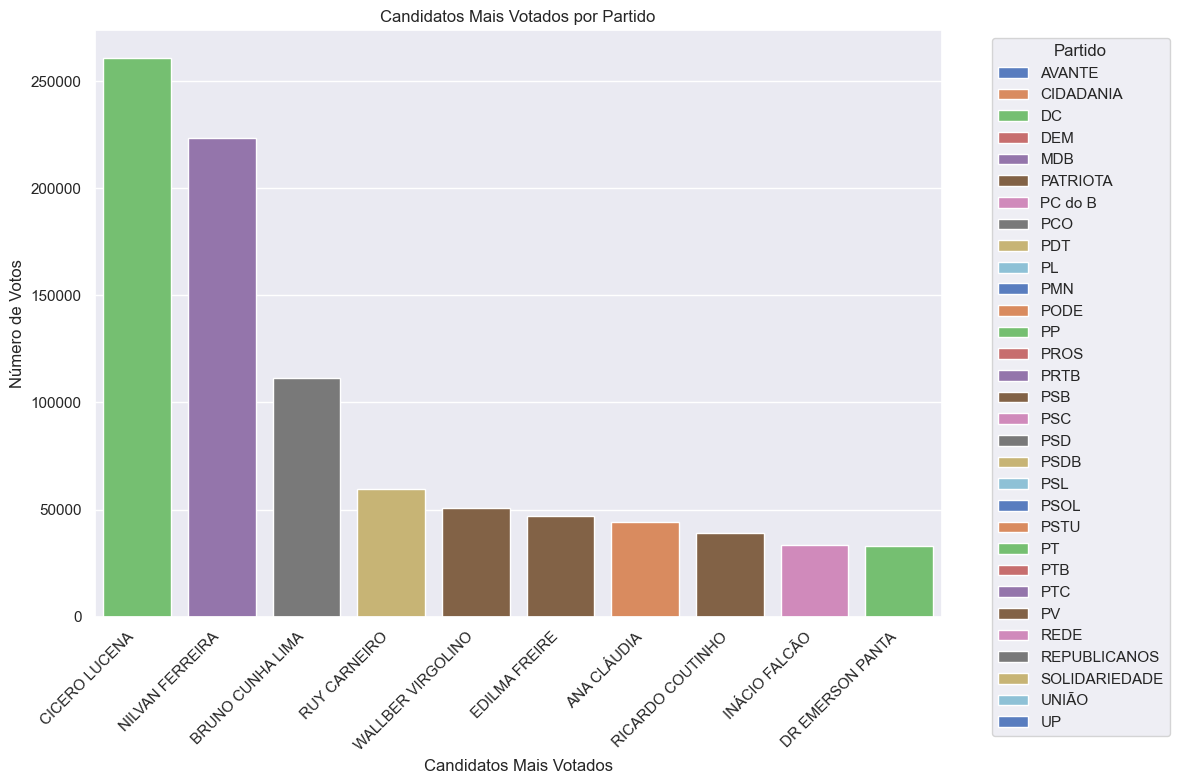

In [70]:
votos_por_candidato = eleicao.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS'].sum().reset_index()

candidatos_mais_votados = votos_por_candidato.sort_values(by='QT_VOTOS', ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=candidatos_mais_votados, x='NM_URNA_CANDIDATO', y='QT_VOTOS', hue='SG_PARTIDO', palette='muted')
ax.set_xlabel('Candidatos Mais Votados')
ax.set_ylabel('Número de Votos')
ax.set_title('Candidatos Mais Votados por Partido')
ax.legend(title='Partido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Explicação do gráfico:
Este gráfico nos permite aprofundar nos dados coletados na análise anterior, onde apenas sabíamos quais partidos eram os mais votados. Agora, com essa nova informação, podemos identificar quais candidatos desses partidos foram os mais votados. Isso nos permite nos aproximarmos ainda mais para determinar se realmente existe uma relação entre o partido do governador(PSB) e os candidatos eleitos no estado.

<Figure size 1200x800 with 0 Axes>

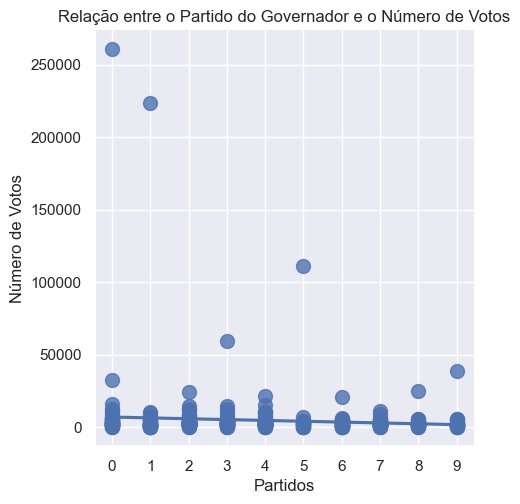

In [71]:
partidos_ordenados = ['PP', 'MDB', 'CIDADANIA', 'PSDB', 'DEM', 'PSD', 'PDT', 'PL', 'REPUBLICANOS', 'PSB']

# Criando um dicionário para mapear cada partido para um número único
party_mapping = {party: i for i, party in enumerate(partidos_ordenados)}

eleicao['SG_PARTIDO_CODE'] = eleicao['SG_PARTIDO'].map(party_mapping)

# Convertendo a variável 'DS_SIT_TOT_TURNO' para uma variável binária (1 para eleito, 0 para não eleito)
eleicao['DS_SIT_TOT_TURNO_BIN'] = eleicao['DS_SIT_TOT_TURNO'].apply(lambda x: 1 if x == 'ELEITO' else 0)

plt.figure(figsize=(12, 8))
ax = sns.lmplot(data=eleicao, x='SG_PARTIDO_CODE', y='QT_VOTOS', palette='muted', ci=None, scatter_kws={'s':100})
ax.set_axis_labels("Partidos", "Número de Votos")
plt.xticks(range(len(partidos_ordenados)), range(len(partidos_ordenados)))
plt.title("Relação entre o Partido do Governador e o Número de Votos")
plt.show()

#### Explicação sobre a possível relação entre o partido do governado e o candidato eleito?
Observando o gráfico e os dados fornecidos, podemos ver que o candidato com mais votos do partido PSB, Ricardo Coutinho, recebeu 38.969 votos, o que é consideravelmente menor em comparação com os candidatos mais votados de outros partidos, como o PP e o MDB. Isso sugere que não há uma relação direta entre o partido do governador (PSB) e o candidato mais votado nas eleições.

Portanto, com base nos dados apresentados, não parece haver uma relação forte entre o partido do governador e o candidato eleito no estado. Outros fatores podem ter influenciado mais fortemente a votação dos candidatos, como o histórico político individual, a campanha eleitoral e as preferências dos eleitores em relação às propostas e ideologias dos candidatos.

### Há relação entre o partido do presidente e o candidato eleito?

In [75]:
import pandas as pd

partidos_votos = eleicao.groupby('SG_PARTIDO')['QT_VOTOS'].sum()

partidos_votos = partidos_votos.sort_values(ascending=False)

partidos_top_votos = partidos_votos.head(10)

print("10 Partidos com mais votos:")
for partido, votos in partidos_top_votos.items():
    print(f"{partido}: {votos}")

10 Partidos com mais votos:
PP: 487636.0
MDB: 335777.0
CIDADANIA: 301249.0
PSDB: 235076.0
DEM: 219934.0
PSD: 159080.0
PDT: 146348.0
PL: 129880.0
REPUBLICANOS: 117644.0
PSB: 96416.0


C:\Users\pedro.cunha\AppData\Local\Temp\ipykernel_7132\516690687.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  partidos_votos = eleicao.groupby('SG_PARTIDO')['QT_VOTOS'].sum()


#### Explicação dos dados apresentados:
Os resultados mostram os 10 partidos políticos que receberam mais votos. Ao analisar essa informação, podemos ter uma visão geral dos partidos que tiveram maior apoio popular nas eleições. Essa informação é importante para entender a distribuição geral de votos entre os partidos e identificar os partidos que tiveram um desempenho mais significativo em termos de votação, permitindo-nos concluir se realmente existe alguma relação entre o partido do Presidente (PL) e os candidatos mais votados.

Além disso, essa visualização nos ajuda a determinar quais partidos devemos explorar para mais análises abaixo.

C:\Users\pedro.cunha\AppData\Local\Temp\ipykernel_7132\2142693463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_por_candidato = eleicao.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS'].sum().reset_index()


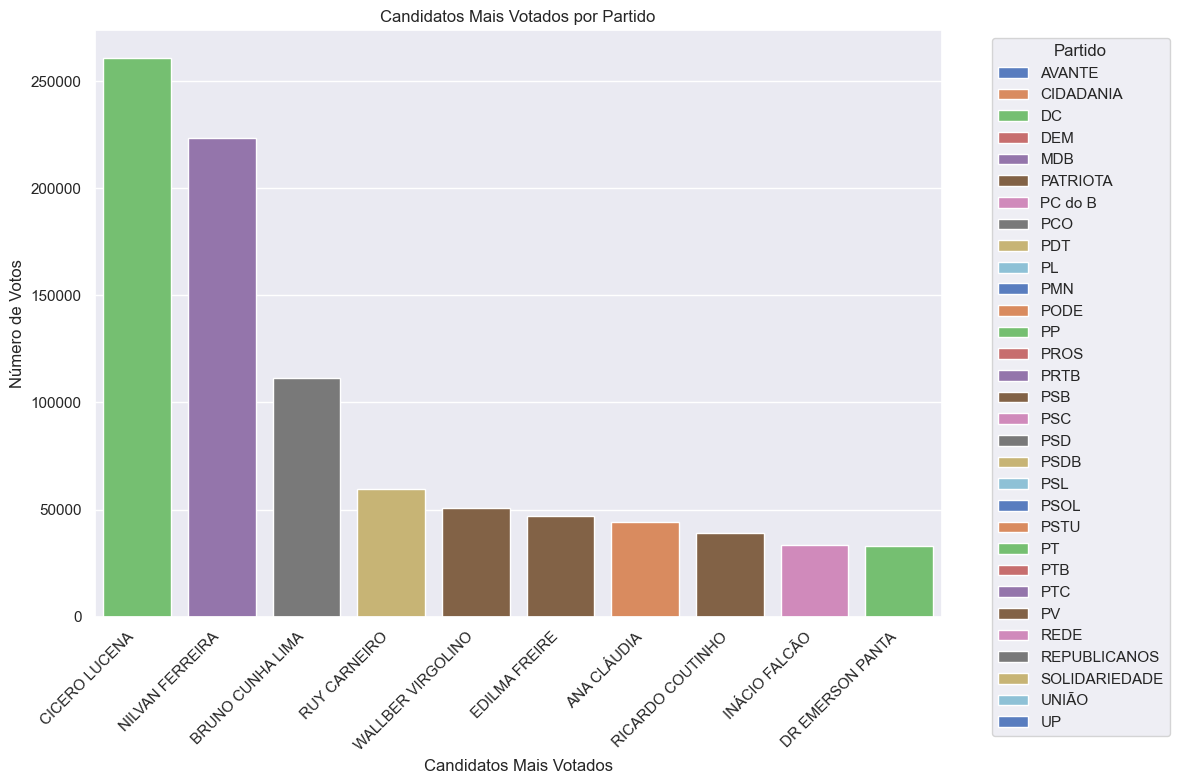

In [91]:
votos_por_candidato = eleicao.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS'].sum().reset_index()

candidatos_mais_votados = votos_por_candidato.sort_values(by='QT_VOTOS', ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=candidatos_mais_votados, x='NM_URNA_CANDIDATO', y='QT_VOTOS', hue='SG_PARTIDO', palette='muted')
ax.set_xlabel('Candidatos Mais Votados')
ax.set_ylabel('Número de Votos')
ax.set_title('Candidatos Mais Votados por Partido')
ax.legend(title='Partido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Explicação do gráfico:
Este gráfico nos permite aprofundar nos dados coletados na análise anterior, onde apenas sabíamos quais partidos eram os mais votados. Agora, com essa nova informação, podemos identificar quais candidatos desses partidos foram os mais votados. Isso nos permite nos aproximarmos ainda mais para determinar se realmente existe uma relação entre o partido do presidente(PL) e os candidatos eleitos no estado.

<Figure size 1200x800 with 0 Axes>

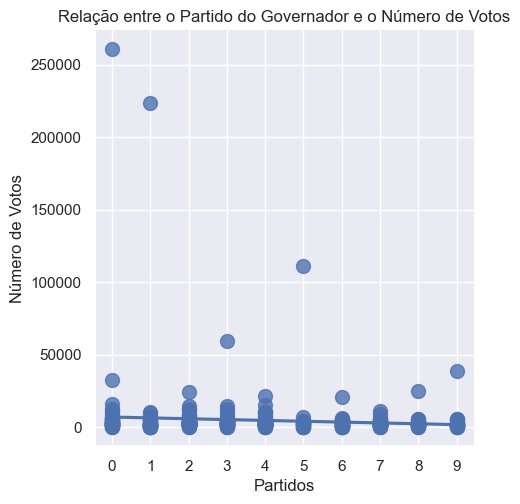

In [76]:
partidos_ordenados = ['PP', 'MDB', 'CIDADANIA', 'PSDB', 'DEM', 'PSD', 'PDT', 'PL', 'REPUBLICANOS', 'PSB']

# Criando um dicionário para mapear cada partido para um número único
party_mapping = {party: i for i, party in enumerate(partidos_ordenados)}

eleicao['SG_PARTIDO_CODE'] = eleicao['SG_PARTIDO'].map(party_mapping)

# Convertendo a variável 'DS_SIT_TOT_TURNO' para uma variável binária (1 para eleito, 0 para não eleito)
eleicao['DS_SIT_TOT_TURNO_BIN'] = eleicao['DS_SIT_TOT_TURNO'].apply(lambda x: 1 if x == 'ELEITO' else 0)

plt.figure(figsize=(12, 8))
ax = sns.lmplot(data=eleicao, x='SG_PARTIDO_CODE', y='QT_VOTOS', palette='muted', ci=None, scatter_kws={'s':100})
ax.set_axis_labels("Partidos", "Número de Votos")
plt.xticks(range(len(partidos_ordenados)), range(len(partidos_ordenados)))
plt.title("Relação entre o Partido do Governador e o Número de Votos")
plt.show()

#### Explicação sobre a possível relação entre o partido do Presidente e o candidato eleito?
Ao analisarmos o gráfico e os dados fornecidos, percebemos que o candidato mais votado do partido PL não está entre os 10 mais votados, pois recebeu apenas 11.533 votos. Esse número é consideravelmente menor em comparação com os candidatos mais votados de outros partidos, como o PP e o MDB. Essa discrepância sugere que não há uma relação direta entre o partido do presidente (PL) e o candidato mais votado nas eleições.

Portanto, com base nos dados apresentados, não parece haver uma relação forte entre o partido do presidente e o candidato eleito no estado. Outros fatores, como o histórico político individual, a campanha eleitoral e as preferências dos eleitores em relação às propostas e ideologias dos candidatos, podem ter influenciado mais fortemente a votação dos candidatos.

### Há uma relação entre o partido que foi eleito com o partido da gestão passada?

In [34]:
# Carregando os dados

eleicao_past_corr = (
    pd.read_csv('dados/eleicao_2020_with_2016_pb_prefeito.csv')
)


eleitos = eleicao_past_corr[eleicao_past_corr['DS_SIT_TOT_TURNO'].str.startswith('ELEITO')]
eleitos.loc[:, 'partido_reeleito'] = eleitos.apply(lambda row: row['SG_PARTIDO'] == row['SG_PAST_PARTIDO'], axis=1)


/tmp/ipykernel_1746/3146200322.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eleitos.loc[:, 'partido_reeleito'] = eleitos.apply(lambda row: row['SG_PARTIDO'] == row['SG_PAST_PARTIDO'], axis=1)


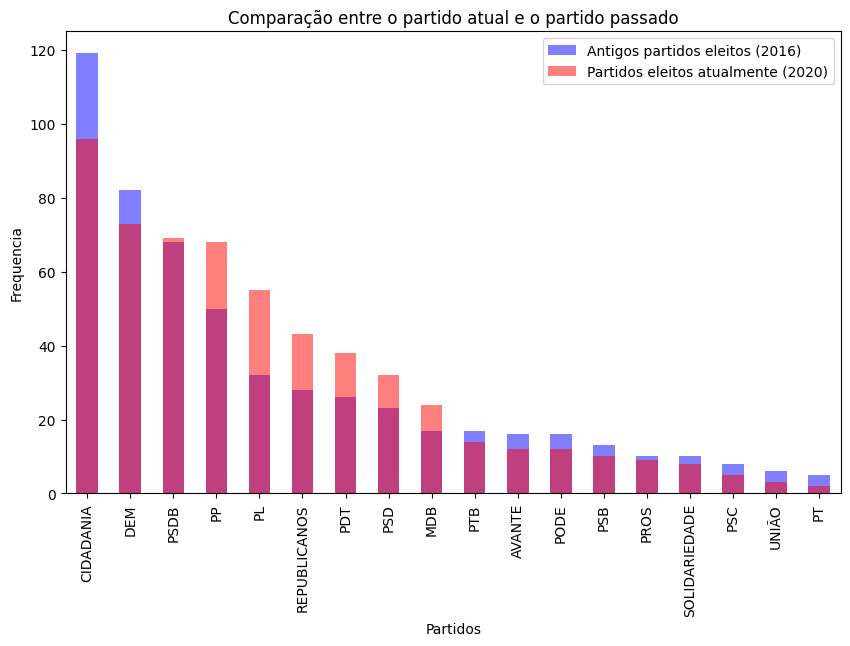

In [35]:
plt.figure(figsize=(10, 6))
eleitos['SG_PAST_PARTIDO'].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Antigos partidos eleitos (2016)')
eleitos['SG_PARTIDO'].value_counts().plot(kind='bar', color='red', alpha=0.5, label='Partidos eleitos atualmente (2020)')
plt.xlabel('Partidos')
plt.ylabel('Frequencia')
plt.title('Comparação entre o partido atual e o partido passado')
plt.legend()
plt.show()

#### Explicação sobre a possível relação entre o partido anterior do candidato e o partido atual:

Como levantado graficamente, o partido Cidadania emergiu como o que teve mais candidatos eleitos em 2020, e também foi o partido com o maior número de candidatos eleitos em 2016, com uma quantidade ainda maior naquele ano. O DEM também se destacou como o segundo mais eleito, com uma quantidade superior em 2016. Essa tendência se repete até chegarmos ao PSDB, que teve uma quantidade de eleitos em 2020 quase igual à de 2016. À medida que avançamos pelos partidos, observamos que eles não seguem um padrão uniforme, com alguns tendo um maior número de eleitos em 2020 e um menor em 2016, como é o caso do PL, PP, Republicanos, entre outros.

### Utilizando outra abordagem de visualização:

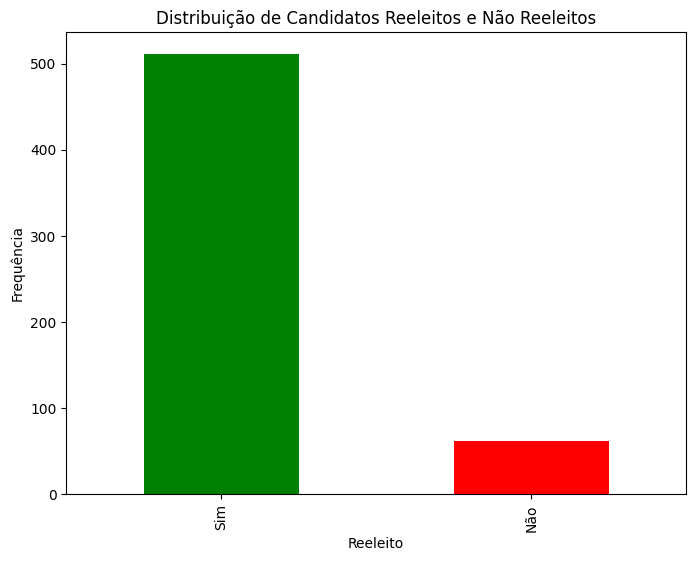

In [36]:
contagem = eleitos['partido_reeleito'].value_counts()
plt.figure(figsize=(8, 6))
contagem.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Candidatos Reeleitos e Não Reeleitos')
plt.xlabel('Reeleito')
plt.ylabel('Frequência')
plt.xticks([0, 1], ['Sim', 'Não'])
plt.show()

#### Explicação sobre os números:
Como observado nos gráficos, há uma forte relação entre o partido do candidato eleito anteriormente e o partido que será eleito novamente. Isso é evidenciado pelo fato de que cerca de 500 candidatos foram reeleitos em 2016, enquanto aproximadamente 100 foram de novos partidos, sem qualquer relação com os anteriores, ou seja, partidos recém-formados.